In [602]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "traffic-accident-prediction"

# **Import**

In [603]:
library(tidyverse)
library(dplyr)
library(ggplot2)
library(gridExtra)
library(psych)
library(ggcorrplot)

# **1. Data Import**

In [604]:
df <- read.csv('/kaggle/input/traffic-accident-prediction/dataset_traffic_accident_prediction1.csv')

## **EDA**

**Data Description**   
* Weather : The weather conditions at the time of the accident.

* Road_Type : The type of road where the accident occurred.

* Time_of_Day : The time of day when the accident happened.

* Traffic_Density : The traffic density at the time of the accident.

* Speed_Limit : The speed limit on the road where the accident occurred.

* Number_of_Vehicles : The number of vehicles involved in the accident.

* Driver_Alcohol : Whether the driver consumed alcohol.

* Accident_Severity : The severity of the accident.

* Road_Condition : The condition of the road surface at the time of the accident.

* Vehicle_Type : The type of vehicle involved in the accident.

* Driver_Age : The age of the driver involved in the accident.

* Driver_Experience : The years of experience the driver has.

* Road_Light_Condition : The lighting condition on the road during the accident.

* Accident :Target

In [605]:
str(df)

'data.frame':	840 obs. of  14 variables:
 $ Weather             : chr  "Rainy" "Clear" "Rainy" "Clear" ...
 $ Road_Type           : chr  "City Road" "Rural Road" "Highway" "City Road" ...
 $ Time_of_Day         : chr  "Morning" "Night" "Evening" "Afternoon" ...
 $ Traffic_Density     : num  1 NA 1 2 1 0 0 0 1 2 ...
 $ Speed_Limit         : num  100 120 60 60 195 120 60 60 60 30 ...
 $ Number_of_Vehicles  : num  5 3 4 3 11 3 4 4 2 2 ...
 $ Driver_Alcohol      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Accident_Severity   : chr  "" "Moderate" "Low" "Low" ...
 $ Road_Condition      : chr  "Wet" "Wet" "Icy" "Under Construction" ...
 $ Vehicle_Type        : chr  "Car" "Truck" "Car" "Bus" ...
 $ Driver_Age          : num  51 49 54 34 62 49 27 29 38 50 ...
 $ Driver_Experience   : num  48 43 52 31 55 43 26 22 29 48 ...
 $ Road_Light_Condition: chr  "Artificial Light" "Artificial Light" "Artificial Light" "Daylight" ...
 $ Accident            : num  0 0 0 0 1 0 1 1 0 0 ...


In [606]:
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Weather*,1,840,3.1261905,1.3039885,3,3.0357143,1.4826,1,6,5,0.426429658,-0.8051725,0.04499188
Road_Type*,2,840,2.9726190,1.0575627,3,2.9032738,1.4826,1,5,4,0.555671626,-0.1456428,0.03648938
Time_of_Day*,3,840,3.0702381,1.1265863,3,3.0252976,1.4826,1,5,4,0.186772076,-0.9584746,0.03887092
Traffic_Density,4,798,1.0012531,0.7848940,1,1.0015625,1.4826,0,2,2,-0.002192115,-1.3788092,0.02778495
Speed_Limit,5,798,71.0501253,32.0524585,60,67.8906250,29.6520,30,213,183,1.846709116,5.1332896,1.13464473
Number_of_Vehicles,6,798,3.2869674,2.0172669,3,3.1156250,1.4826,1,14,13,2.117303932,7.8978984,0.07141047
Driver_Alcohol,7,798,0.1604010,0.3672077,0,0.0765625,0.0000,0,1,1,1.847311124,1.4143354,0.01299901
Accident_Severity*,8,840,3.0928571,0.7569756,3,3.1785714,0.0000,1,4,3,-0.846969555,0.9218868,0.02611814
Road_Condition*,9,840,2.8964286,1.2264415,2,2.8080357,1.4826,1,5,4,0.627291441,-0.9308621,0.04231625


**Check missing value**

In [607]:
na <- data.frame(colSums(is.na(df)))
na

,colSums.is.na.df..
,<dbl>
Weather,0
Road_Type,0
Time_of_Day,0
Traffic_Density,42
Speed_Limit,42
Number_of_Vehicles,42
Driver_Alcohol,42
Accident_Severity,0
Road_Condition,0


**Duplicate check**

In [608]:
sum(duplicated(df))

[1] 14

In [609]:
head(df)

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
1,Rainy,City Road,Morning,1,100,5,0,,Wet,Car,51,48,Artificial Light,0
2,Clear,Rural Road,Night,NA,120,3,0,Moderate,Wet,Truck,49,43,Artificial Light,0
3,Rainy,Highway,Evening,1,60,4,0,Low,Icy,Car,54,52,Artificial Light,0
4,Clear,City Road,Afternoon,2,60,3,0,Low,Under Construction,Bus,34,31,Daylight,0
5,Rainy,Highway,Morning,1,195,11,0,Low,Dry,Car,62,55,Artificial Light,1
6,Clear,Rural Road,Night,0,120,3,0,Moderate,,Truck,49,43,Artificial Light,0


In [610]:
tail(df)

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
835,Rainy,City Road,Evening,0,60,NA,1,Low,Under Construction,Car,33,27,Artificial Light,NA
836,Clear,Highway,Night,2,30,4,0,Low,Dry,Car,23,15,Daylight,0
837,Rainy,Rural Road,Evening,2,60,4,0,Low,Dry,Motorcycle,52,46,Daylight,1
838,Foggy,Highway,Evening,NA,30,4,1,High,Dry,Car,NA,34,Artificial Light,NA
839,Foggy,Highway,Afternoon,2,60,3,0,Low,Dry,Car,25,19,Artificial Light,0
840,Clear,Highway,Afternoon,1,60,4,0,Low,Dry,Motorcycle,29,21,Artificial Light,0


# **2. Data Transform**

## **Replace missing value**

In [611]:
df$Traffic_Density[is.na(df$Traffic_Density) == T] <- median(df$Traffic_Density, na.rm=T)
df$Number_of_Vehicles[is.na(df$Number_of_Vehicles) == T] <- median(df$Number_of_Vehicles, na.rm=T)
df$Driver_Experience[is.na(df$Driver_Experience) == T] <- median(df$Driver_Experience, na.rm=T)
df$Accident[is.na(df$Accident) == T] <- median(df$Accident, na.rm=T)

df$Driver_Alcohol[is.na(df$Driver_Alcohol) == T] <- median(df$Driver_Alcohol, na.rm=T)
df$Driver_Age[is.na(df$Driver_Age) == T] <- median(df$Driver_Age, na.rm=T)
df$Accident[is.na(df$Accident) == T] <- median(df$Accident, na.rm=T)

In [612]:
df$Weather <- ifelse(df$Weather == '', 'None', df$Weather)
df$Road_Type <- ifelse(df$Road_Type == '', 'None', df$Road_Type)
df$Time_of_Day <- ifelse(df$Time_of_Day == '', 'None', df$Time_of_Day)
df$Accident_Severity <- ifelse(df$Accident_Severity == '', 'None', df$Accident_Severity)
df$Road_Condition <- ifelse(df$Road_Condition == '', 'None', df$Road_Condition)
df$Vehicle_Type <- ifelse(df$Vehicle_Type == '', 'None', df$Vehicle_Type)
df$Road_Light_Condition <- ifelse(df$Road_Light_Condition == '', 'None', df$Road_Light_Condition)

## **Remove Duplication**

In [613]:
df <- unique(df)

**Data Check**

In [614]:
colSums(is.na(df))

Weather            Road_Type          Time_of_Day 
                   0                    0                    0 
     Traffic_Density          Speed_Limit   Number_of_Vehicles 
                   0                   42                    0 
      Driver_Alcohol    Accident_Severity       Road_Condition 
                   0                    0                    0 
        Vehicle_Type           Driver_Age    Driver_Experience 
                   0                    0                    0 
Road_Light_Condition             Accident 
                   0                    0

In [615]:
sum(duplicated(df))

[1] 0

# **3. Data Visulization**

In [616]:
num_cols <- {}

for(i in 1:length(df)){
    if(is.numeric(df[[i]]) == TRUE)
        num_cols <- c(num_cols ,colnames(df[i]))
}

In [617]:
cat_cols <- {}

for(i in 1:length(df)){
    if(is.character(df[[i]]) == TRUE)
        cat_cols <- c(cat_cols ,colnames(df[i]))
}

## **Histogram & Boxplot & Density plot**

In [618]:
options(repr.plot.width = 13.0, repr.plot.height = 7.0)

Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”
Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”
Warning message:
“Removed 42 rows containing non-finite outside the scale range (`stat_count()`).”
Warning message:
“Removed 42 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 42 rows containing non-finite outside the scale range
(`stat_density()`).”
Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


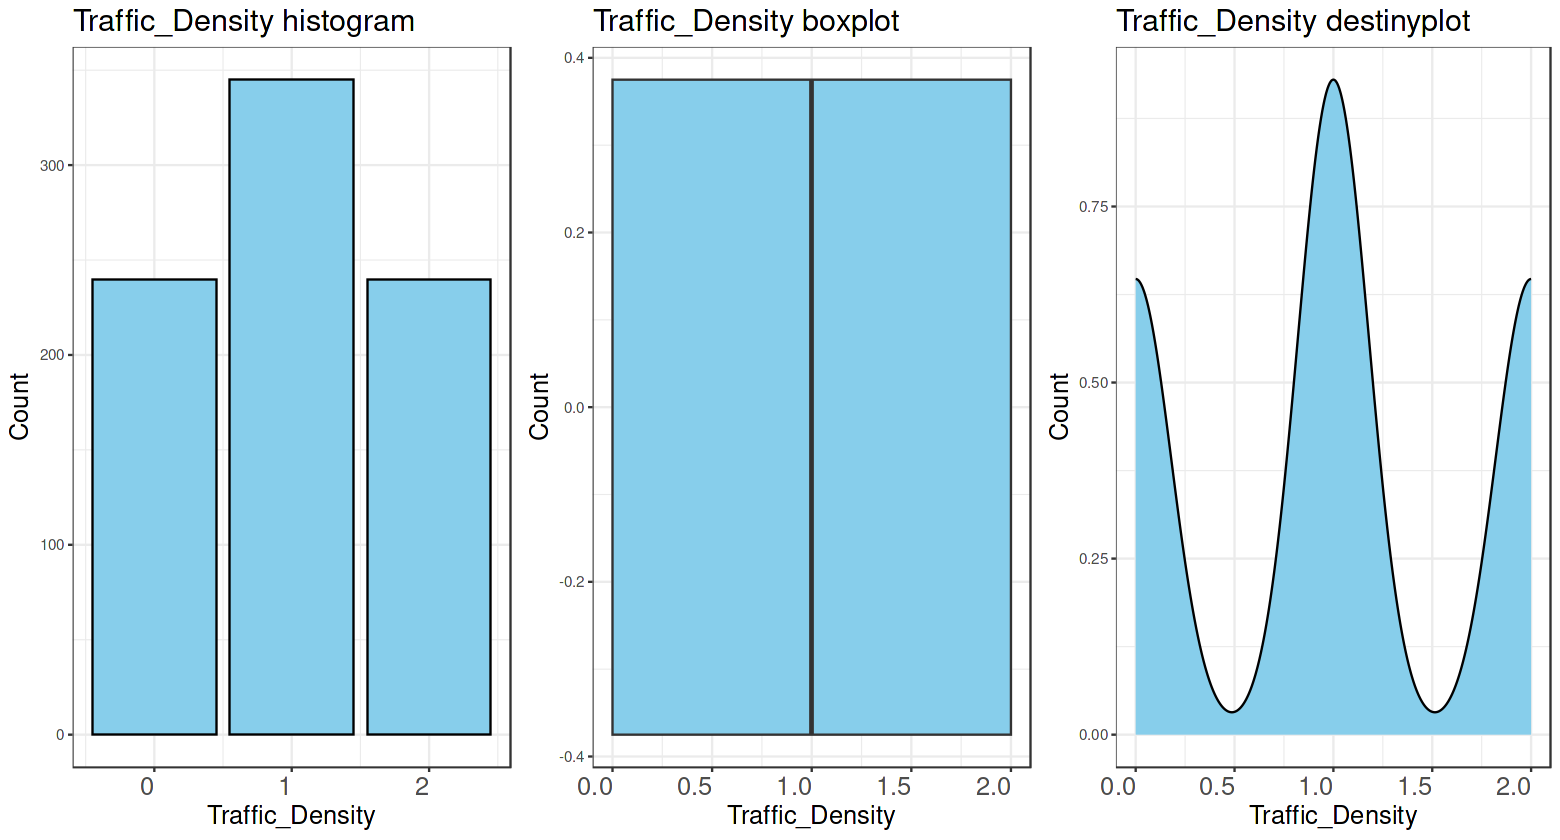

Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


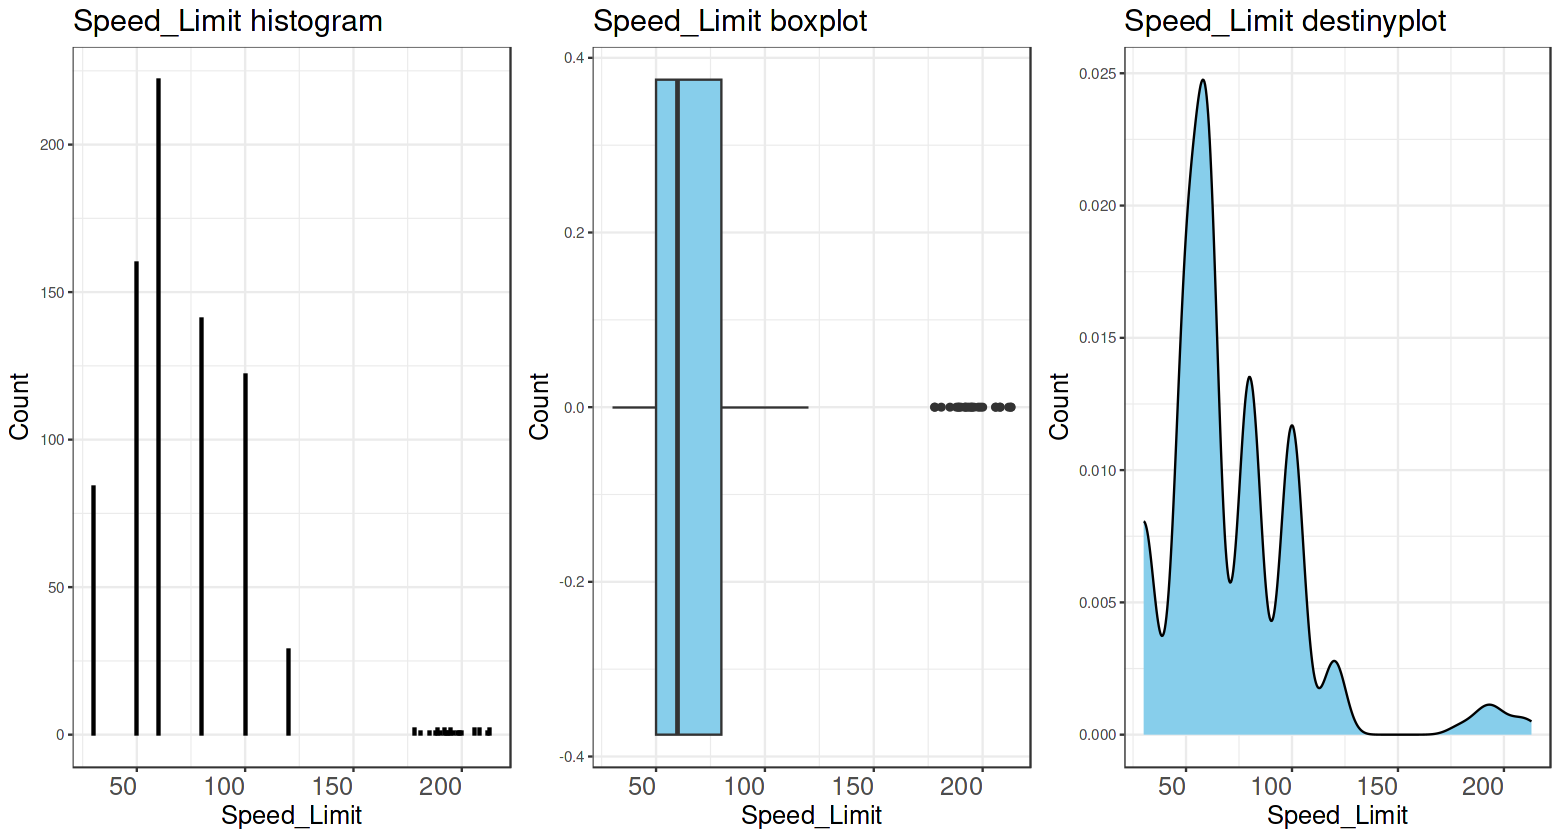

Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


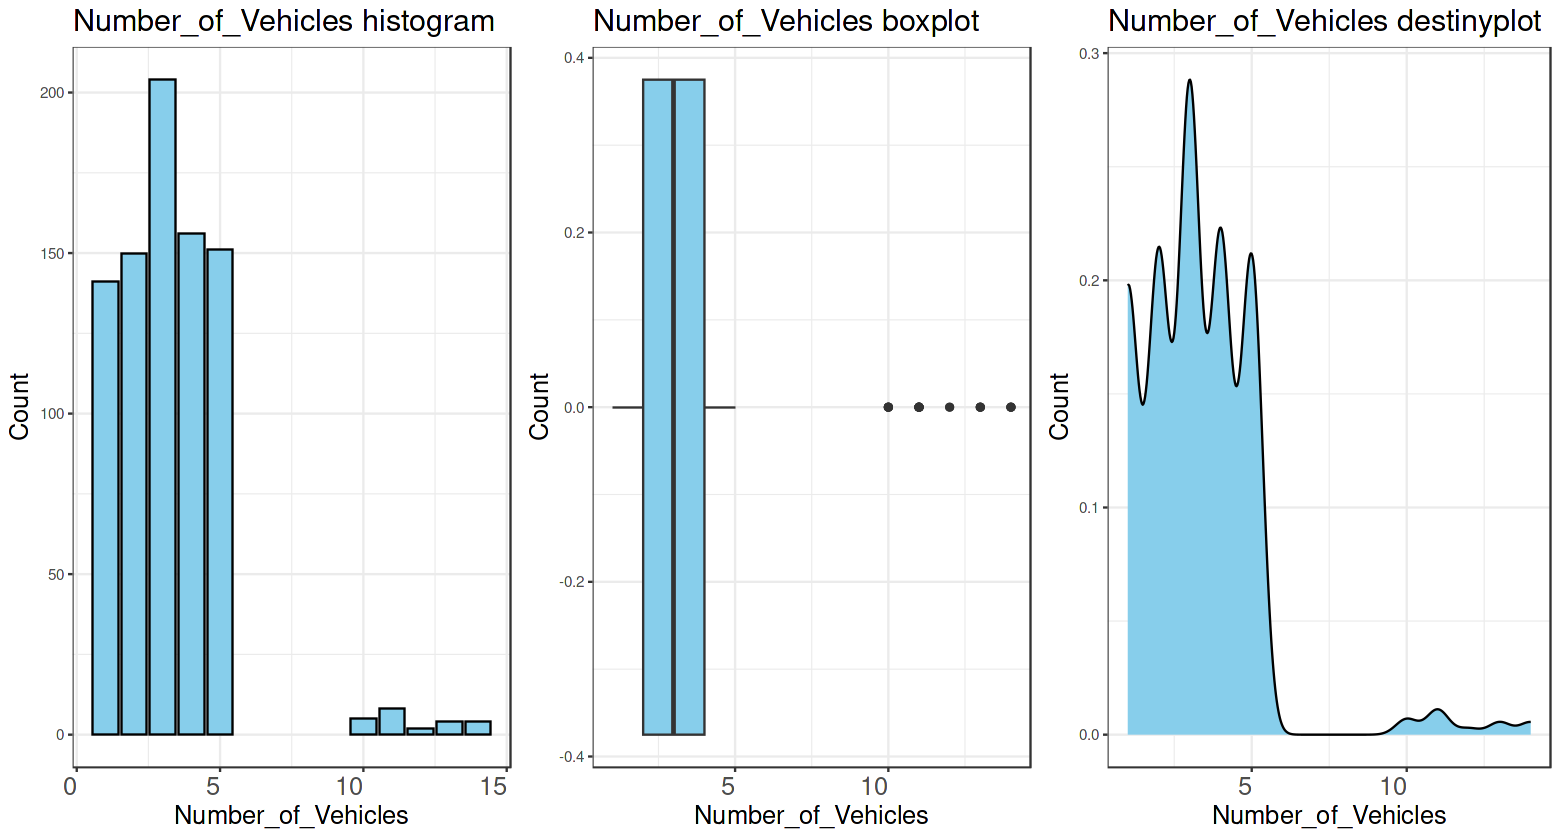

Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


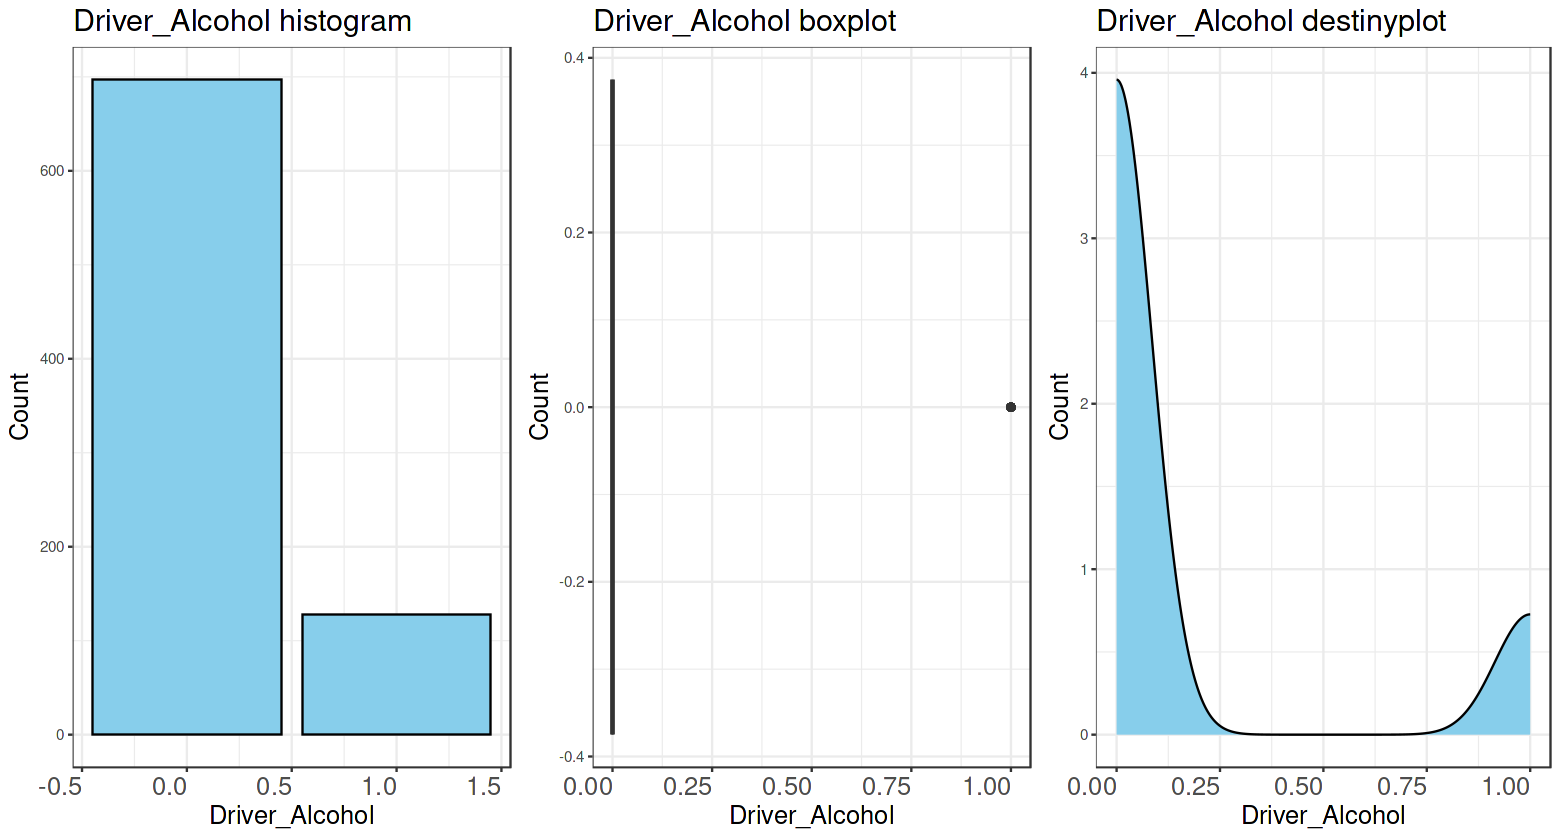

Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


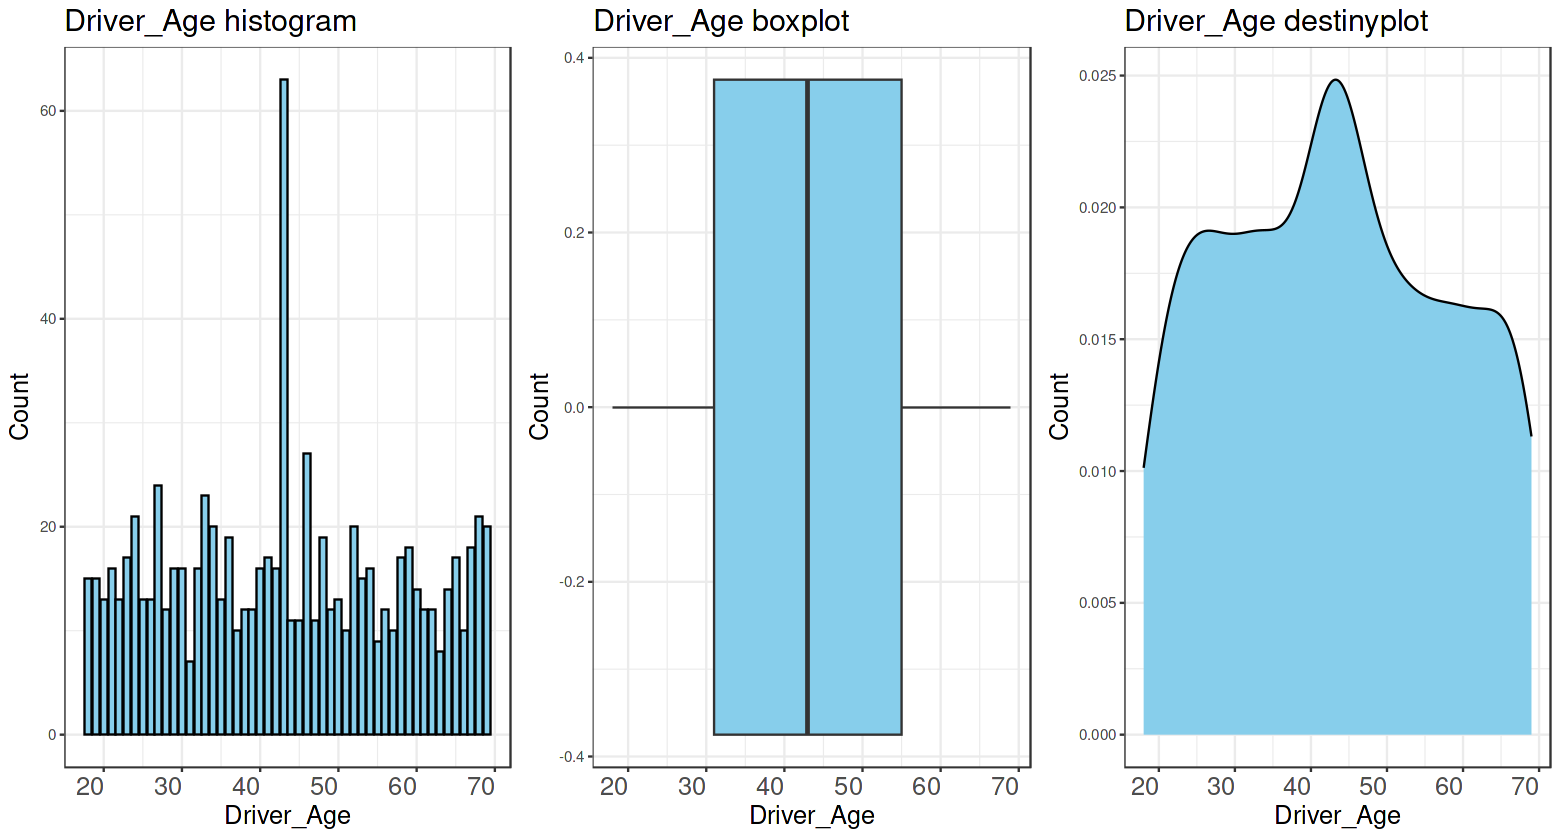

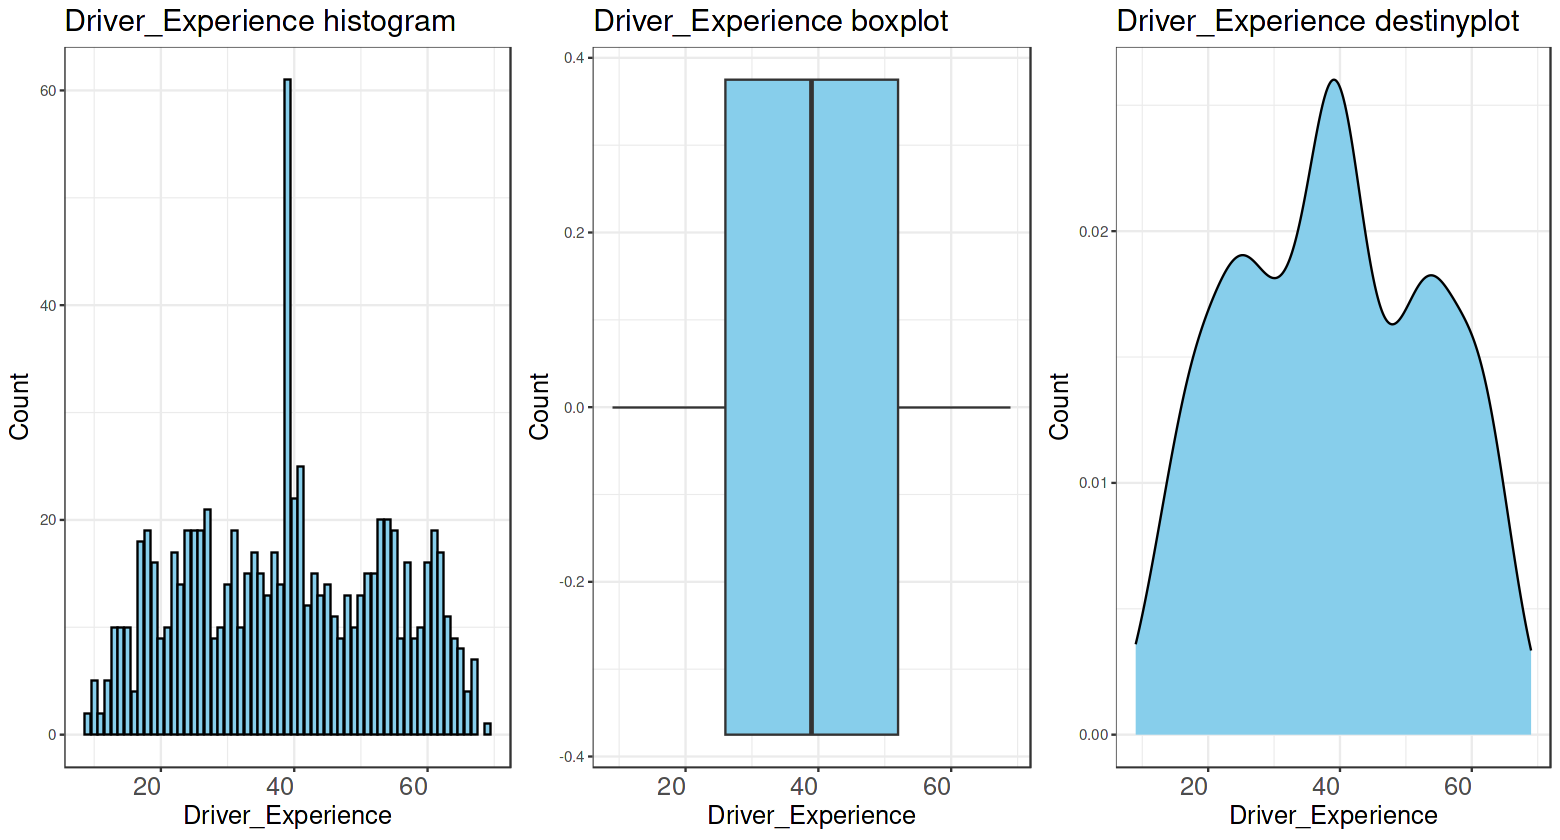

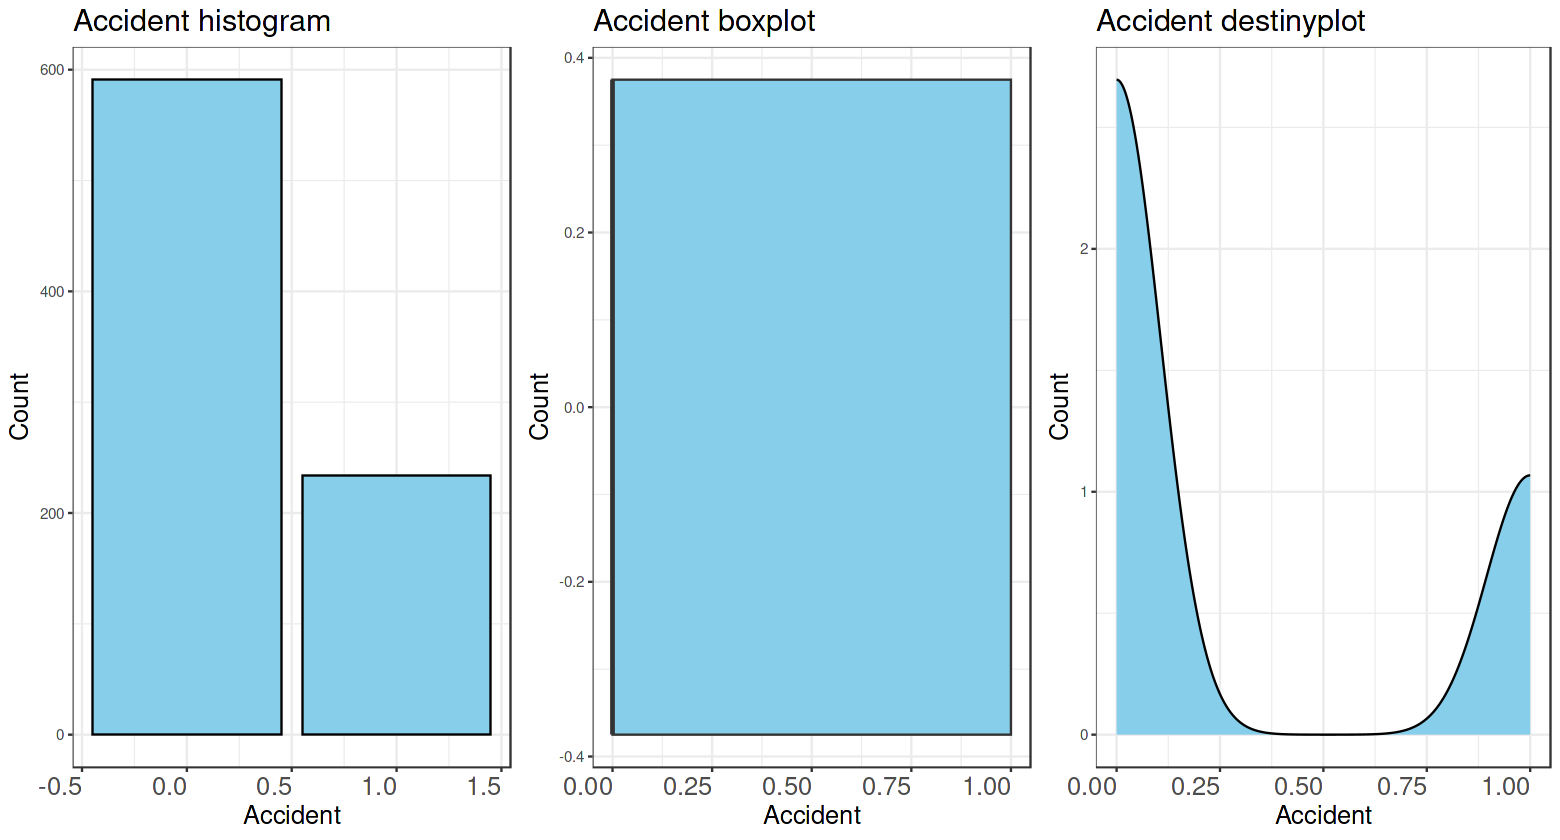

In [619]:
for(i in num_cols){
    a <- ggplot(df) + geom_histogram(aes(x= df[,i]), fill = 'skyblue', col = 'black', position = 'dodge', stat="count") + 
            labs(title = paste0(names(df[i]),' histogram'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )
    
    b <- ggplot(df) + geom_boxplot(aes(x= df[,i]), fill = 'skyblue') + 
            labs(title = paste0(names(df[i]),' boxplot'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            ) 

    c <- ggplot(df) + geom_density(aes(x= df[,i]), fill = 'skyblue') + 
            labs(title = paste0(names(df[i]),' destinyplot'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            ) 
    grid.arrange(a,b ,c, ncol = 3)    
}

## **CountPlot**

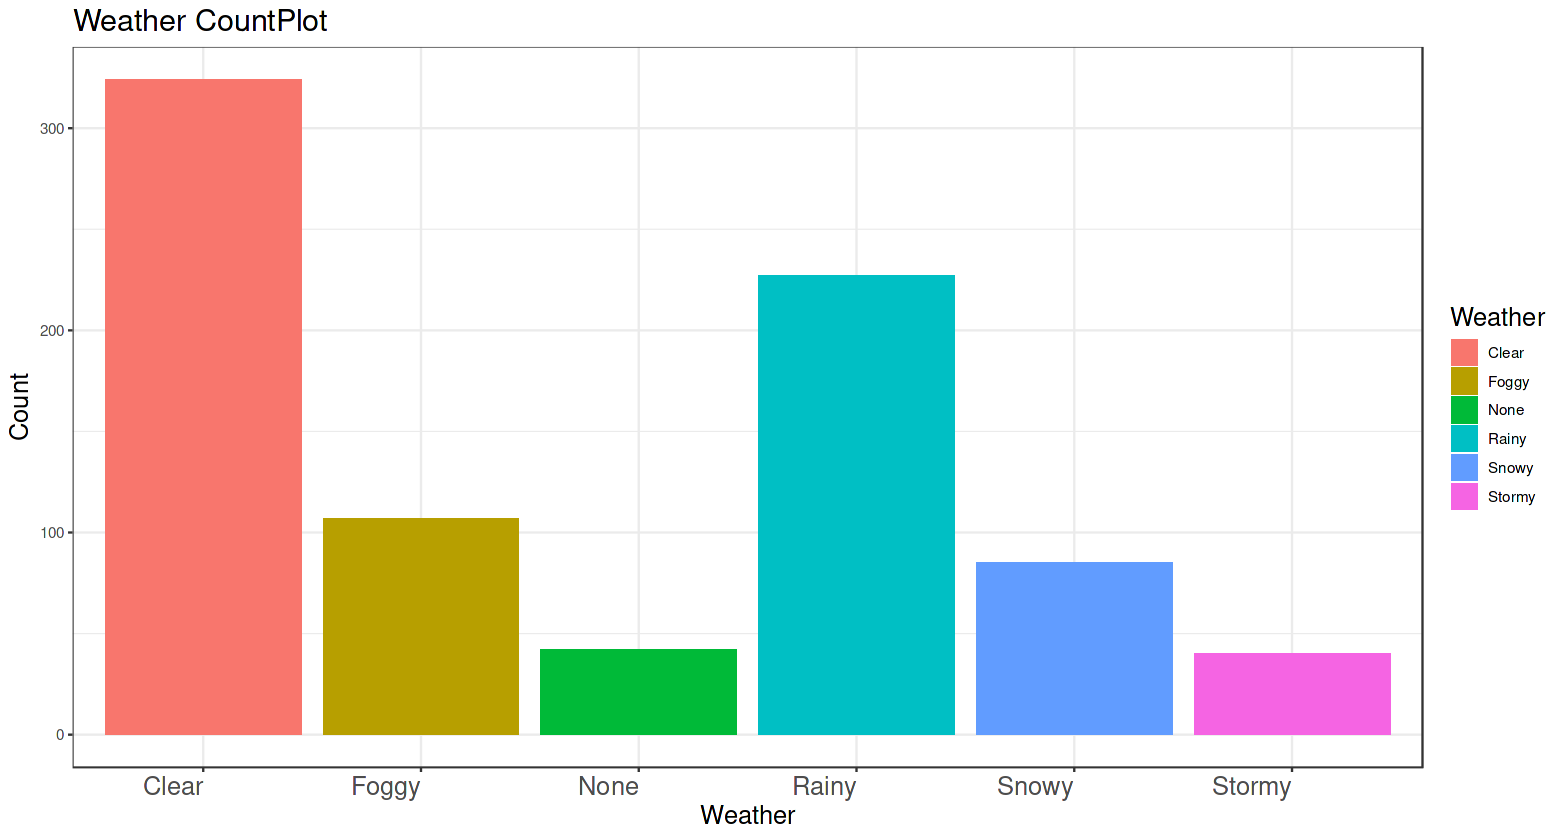

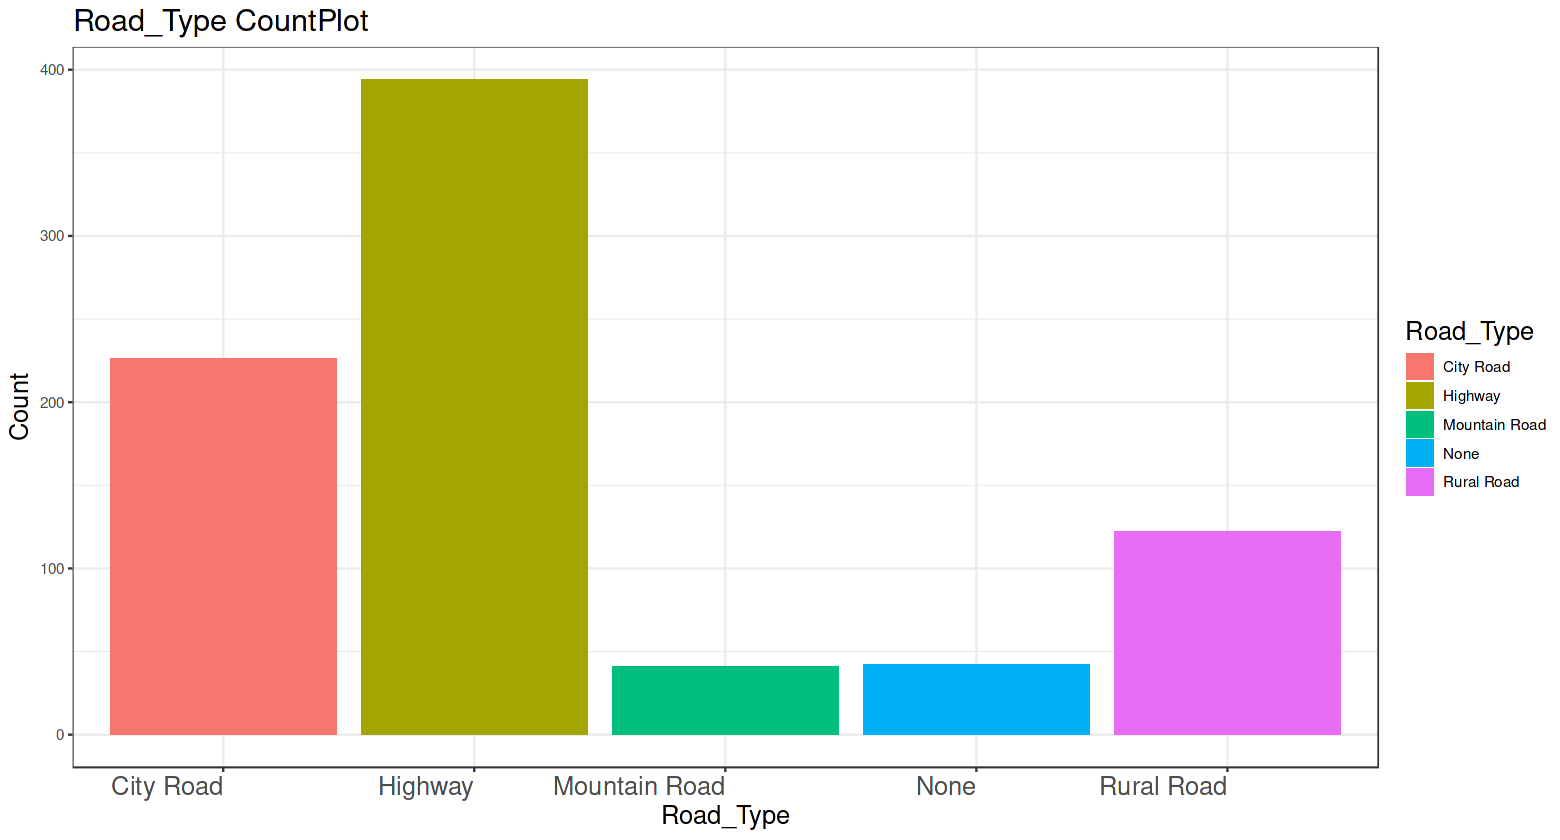

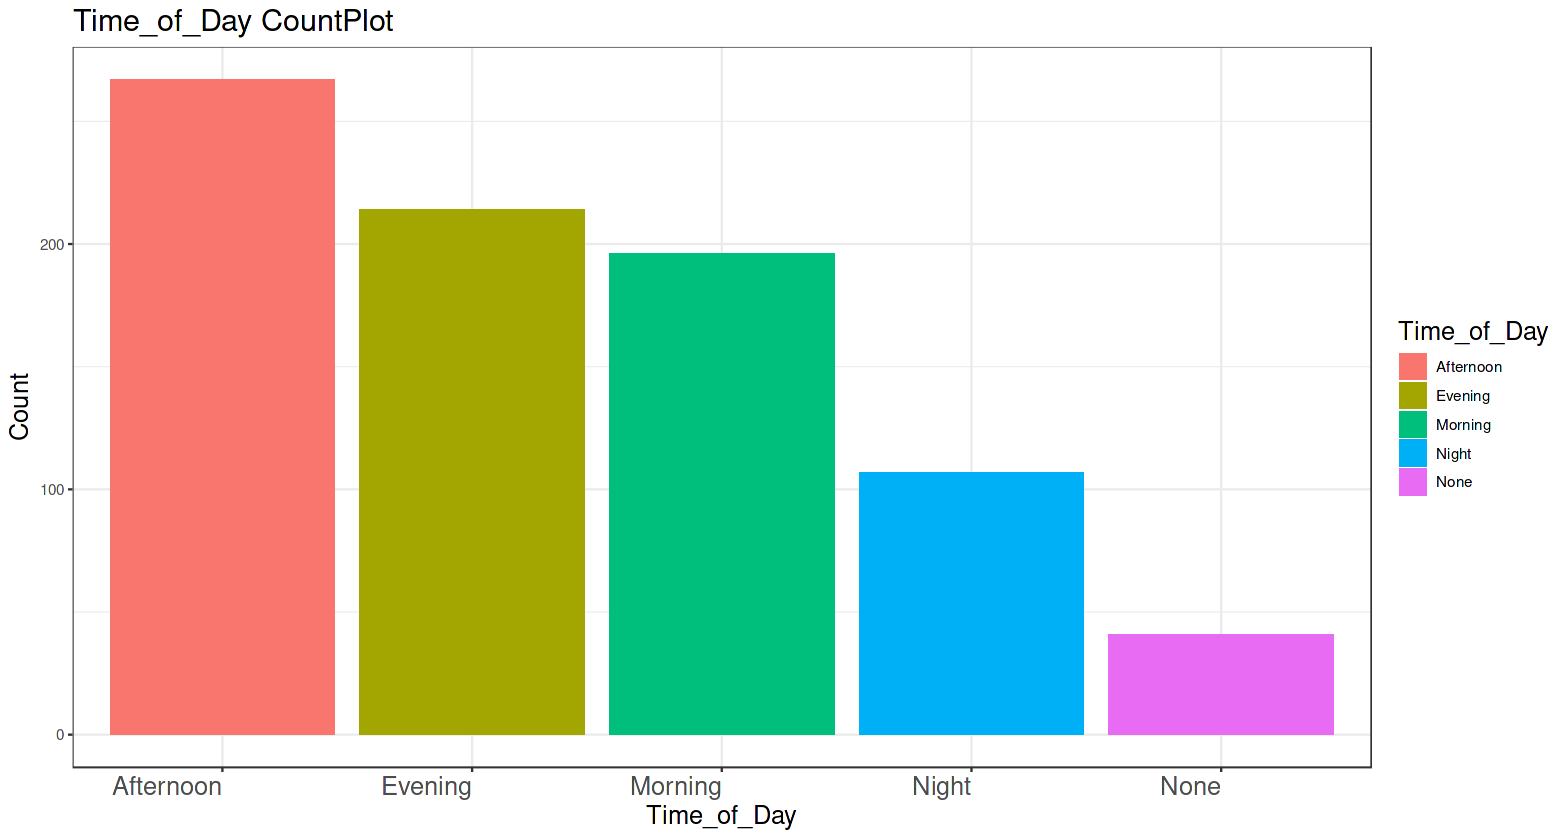

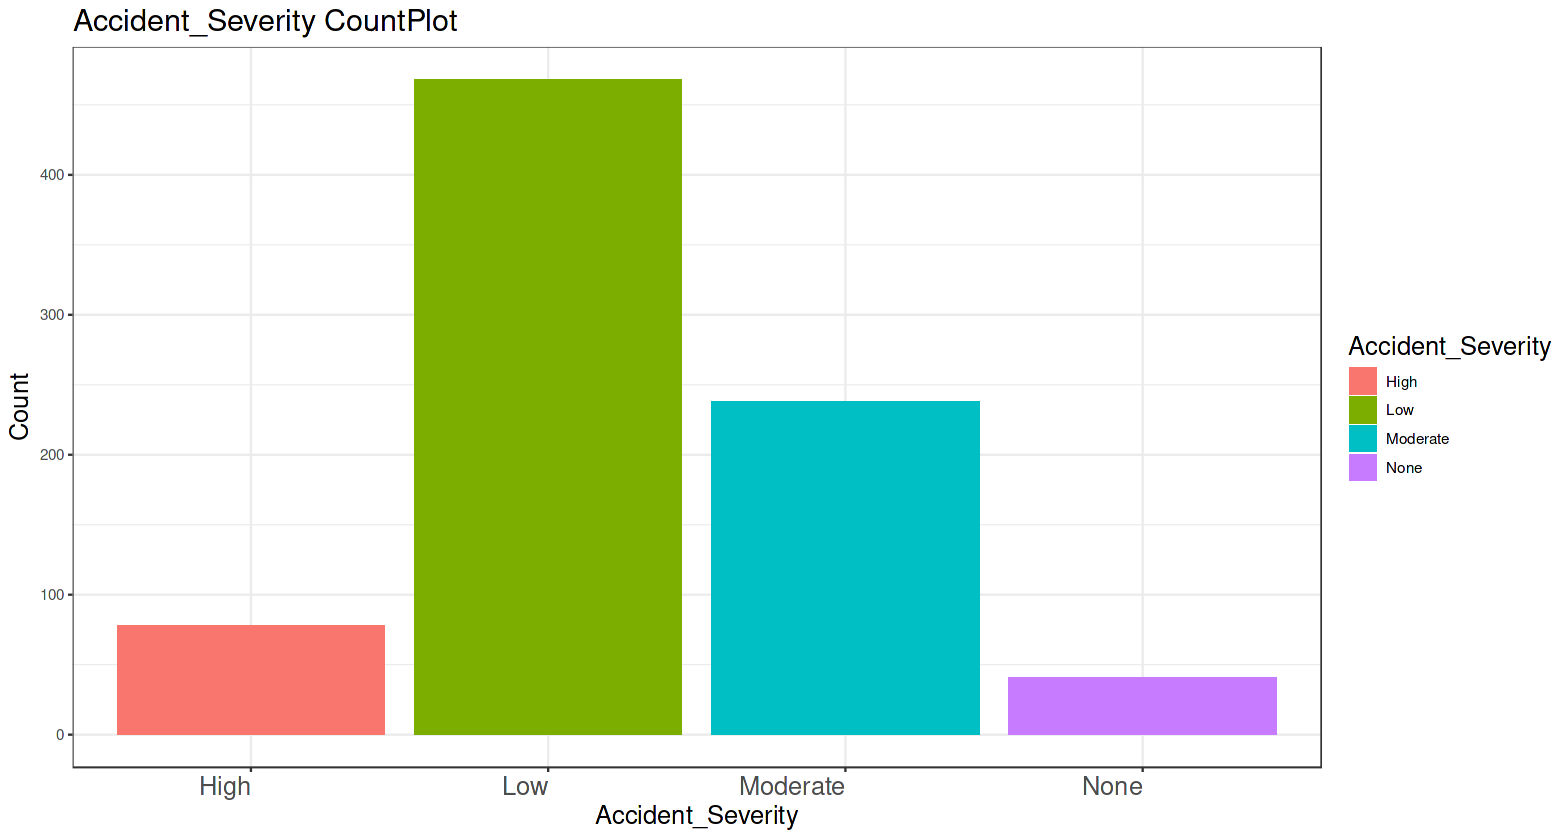

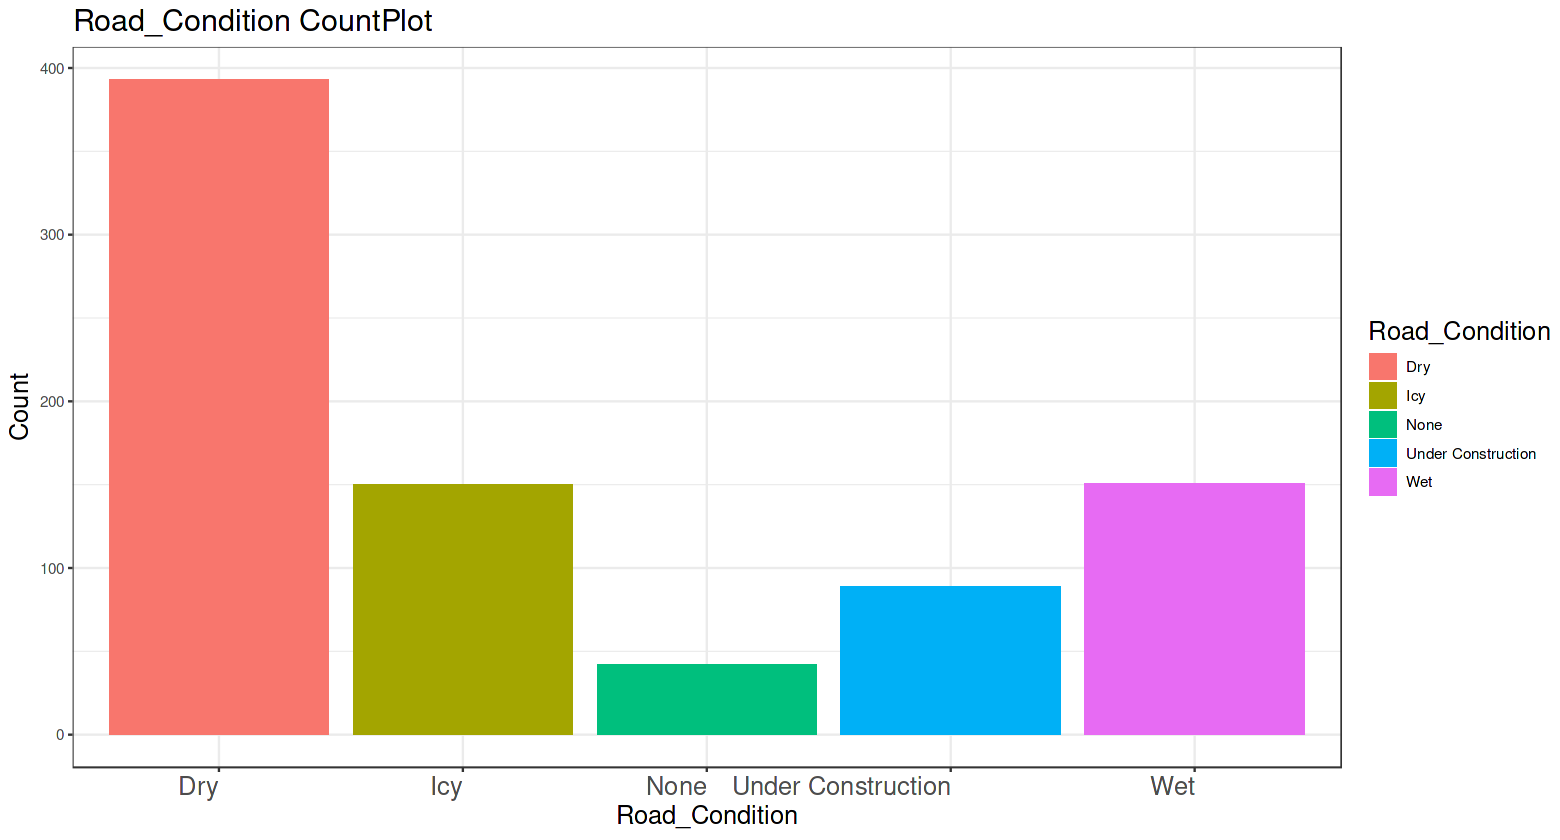

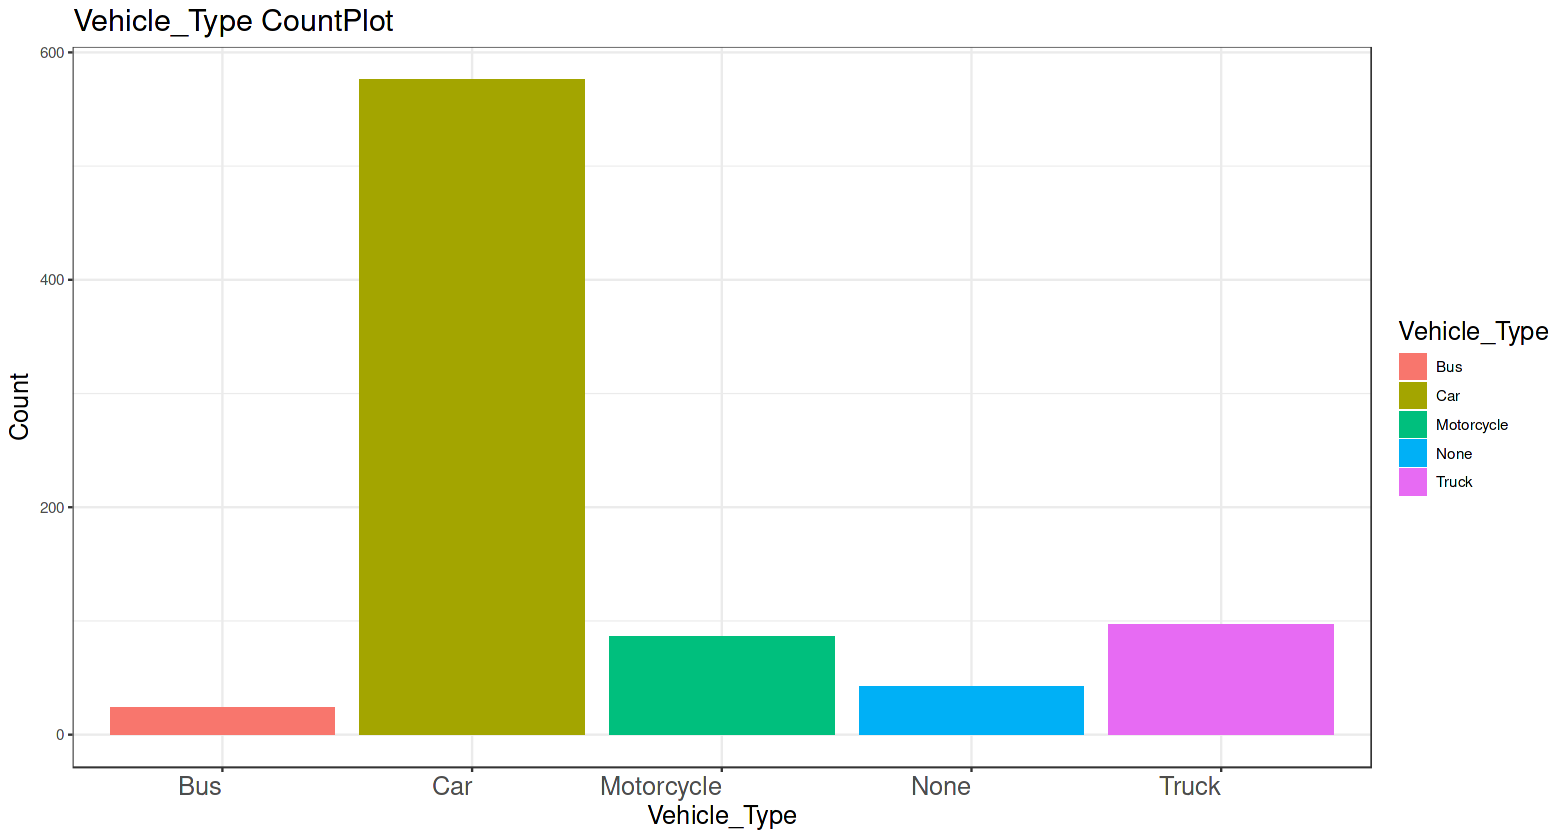

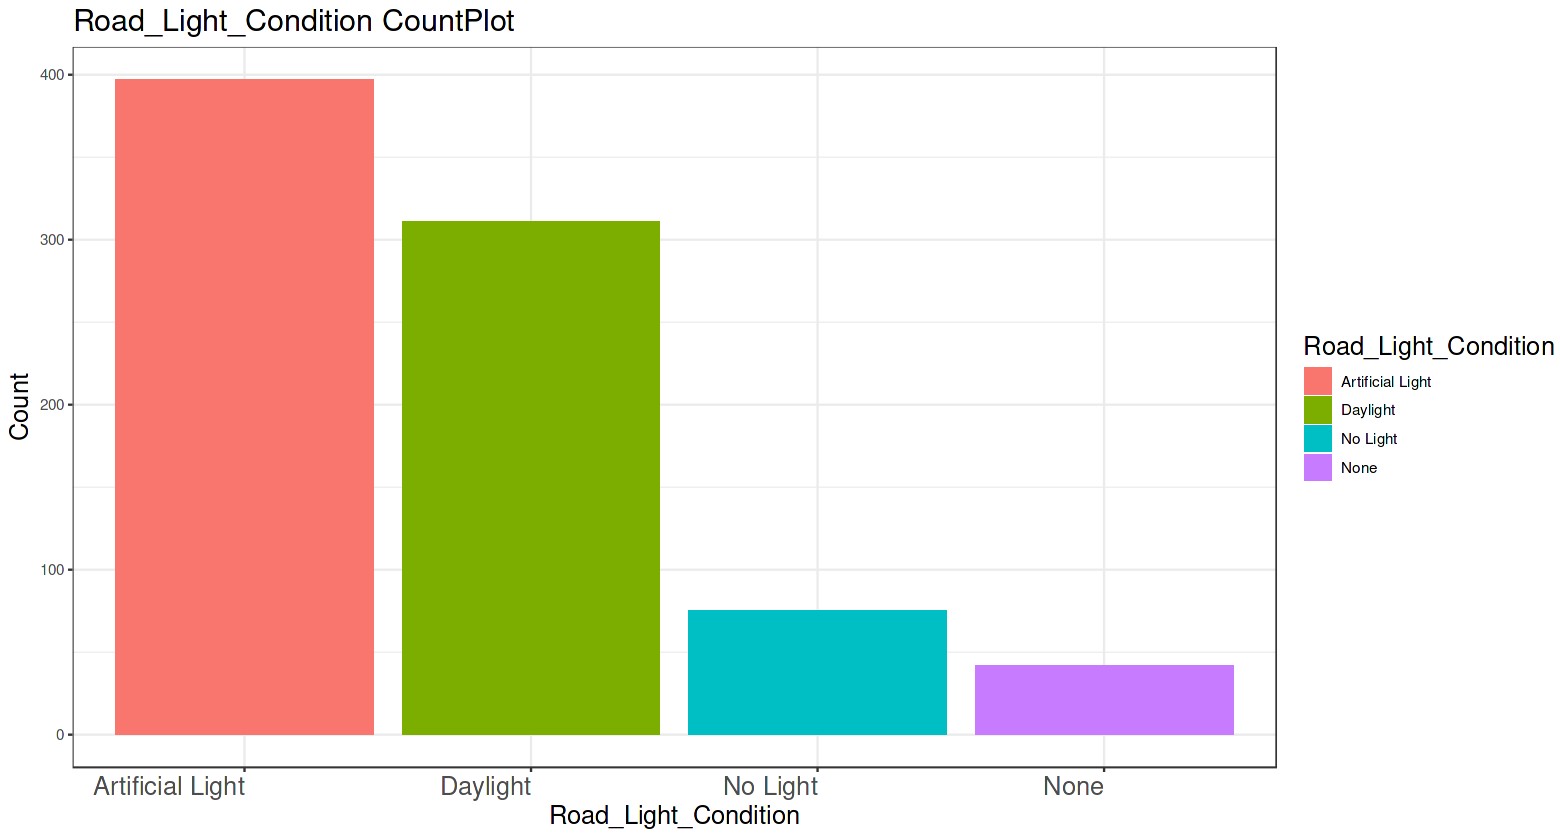

In [620]:
for(i in cat_cols){
    a <- ggplot(df) + geom_bar(aes(x= df[,i], fill = df[,i])) + 
            labs(title = paste0(names(df[i]),' CountPlot'), x = names(df[i]), y = 'Count', fill = i ) + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )
    grid.arrange(a, ncol = 1)  
}

## **Accidents caused by alcohol consumption**

In [621]:
Accident_alcohol <- df %>% group_by(Driver_Alcohol, Accident) %>% count(Driver_Alcohol)

In [622]:
Accident_alcohol

Driver_Alcohol,Accident,n
<dbl>,<dbl>,<int>
0,0,501
0,1,196
1,0,90
1,1,38


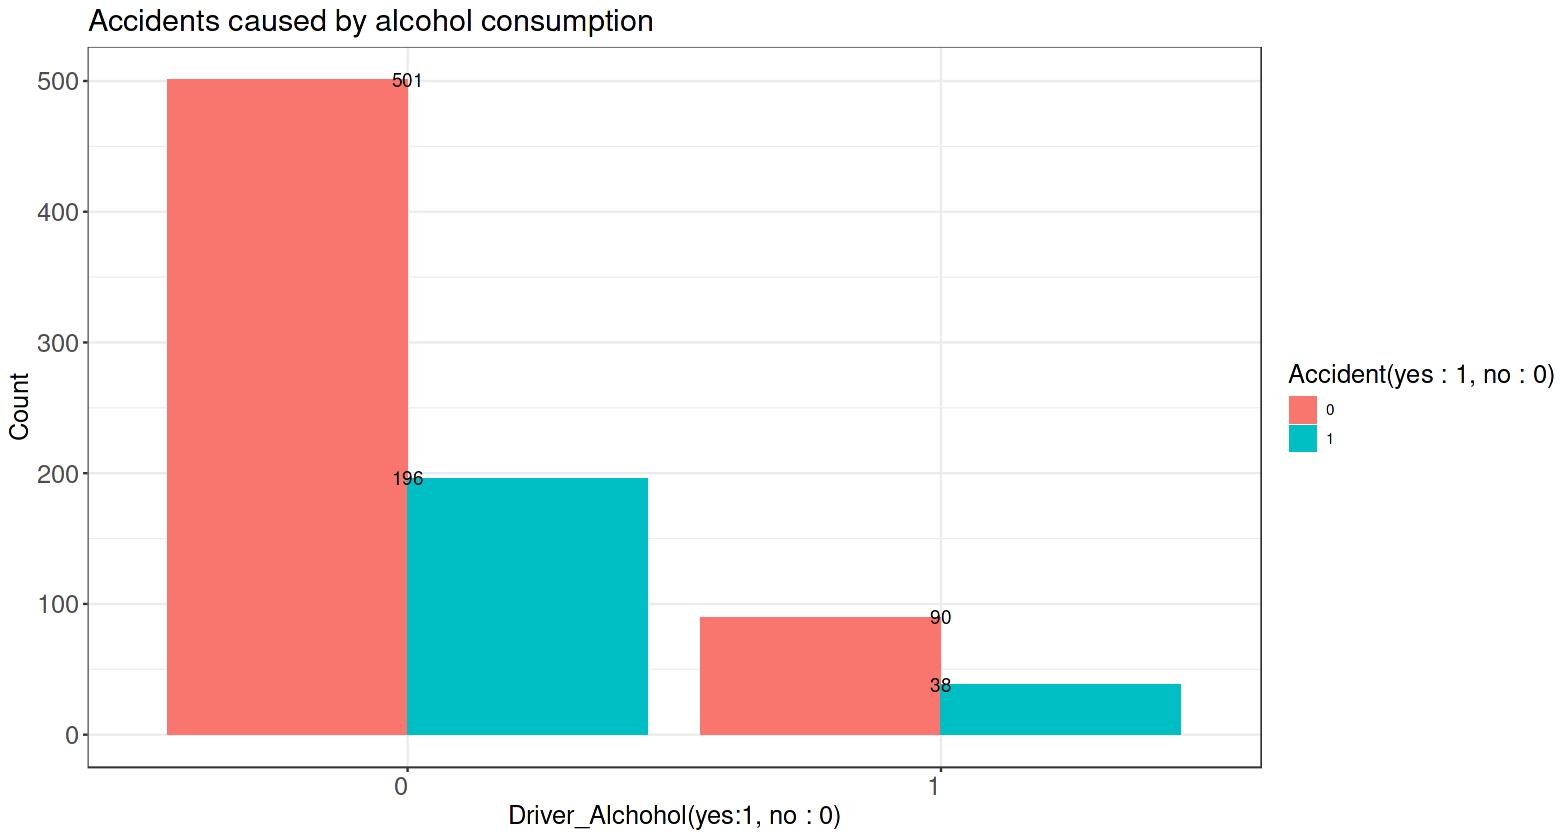

In [623]:
ggplot(Accident_alcohol) + geom_col(aes(x=factor(Driver_Alcohol) , y = n , fill = factor(Accident)), position = "dodge") +
    geom_text(aes(x=factor(Driver_Alcohol) , y = n, label = n )) +
    ggtitle('Accidents caused by alcohol consumption') +
    xlab('Driver_Alchohol(yes:1, no : 0)') +
    ylab('Count')+
    theme_bw() +
    labs(fill = "Accident(yes : 1, no : 0)")+
    theme(
    axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    axis.text.y = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

## **Accidents caused by Weather**

In [624]:
Accident_Weather <- df %>% group_by(Weather, Accident) %>% count(Weather)

In [625]:
Accident_Weather

Weather,Accident,n
<chr>,<dbl>,<int>
Clear,0,220
Clear,1,104
Foggy,0,79
Foggy,1,28
None,0,31
None,1,11
Rainy,0,177
Rainy,1,50
Snowy,0,59


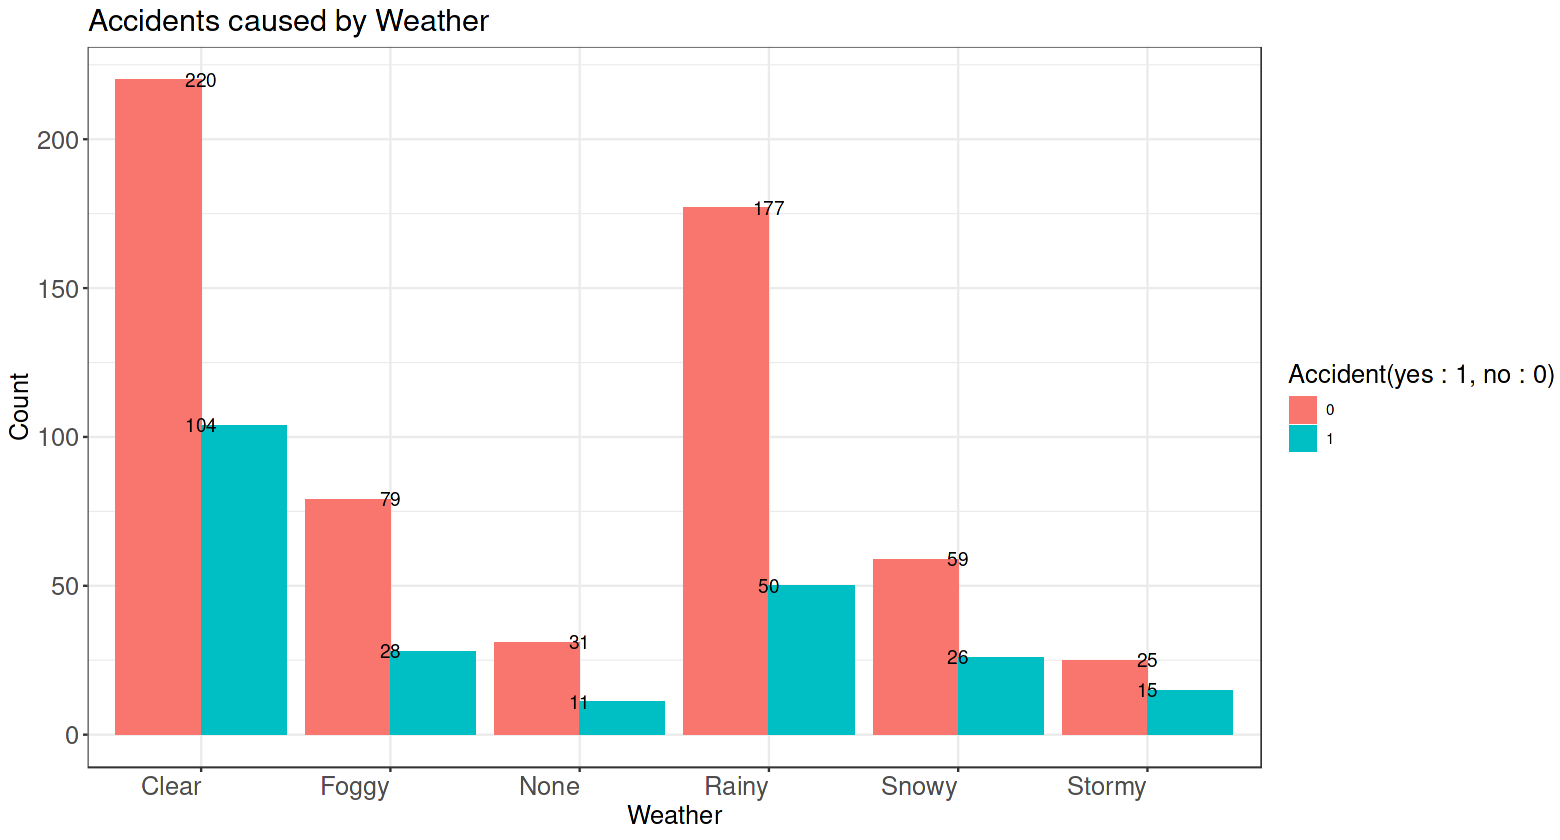

In [626]:
ggplot(Accident_Weather) + geom_col(aes(x=factor(Weather) , y = n , fill = factor(Accident)), position = "dodge") +
    geom_text(aes(x=factor(Weather) , y = n, label = n )) +
    ggtitle('Accidents caused by Weather') +
    xlab('Weather') +
    ylab('Count')+
    theme_bw() +
    labs(fill = "Accident(yes : 1, no : 0)")+
    theme(
    axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    axis.text.y = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

## **Which car has the most accidents?**

In [627]:
Accident_Vehicle <- df %>% group_by(Vehicle_Type, Accident) %>% count(Accident) %>% filter(Accident == 1)

In [628]:
Accident_Vehicle

Vehicle_Type,Accident,n
<chr>,<dbl>,<int>
Bus,1,8
Car,1,157
Motorcycle,1,25
None,1,10
Truck,1,34


In [629]:
pct <- paste(round(Accident_Vehicle$n / sum(Accident_Vehicle$n) * 100 ,1),'%')

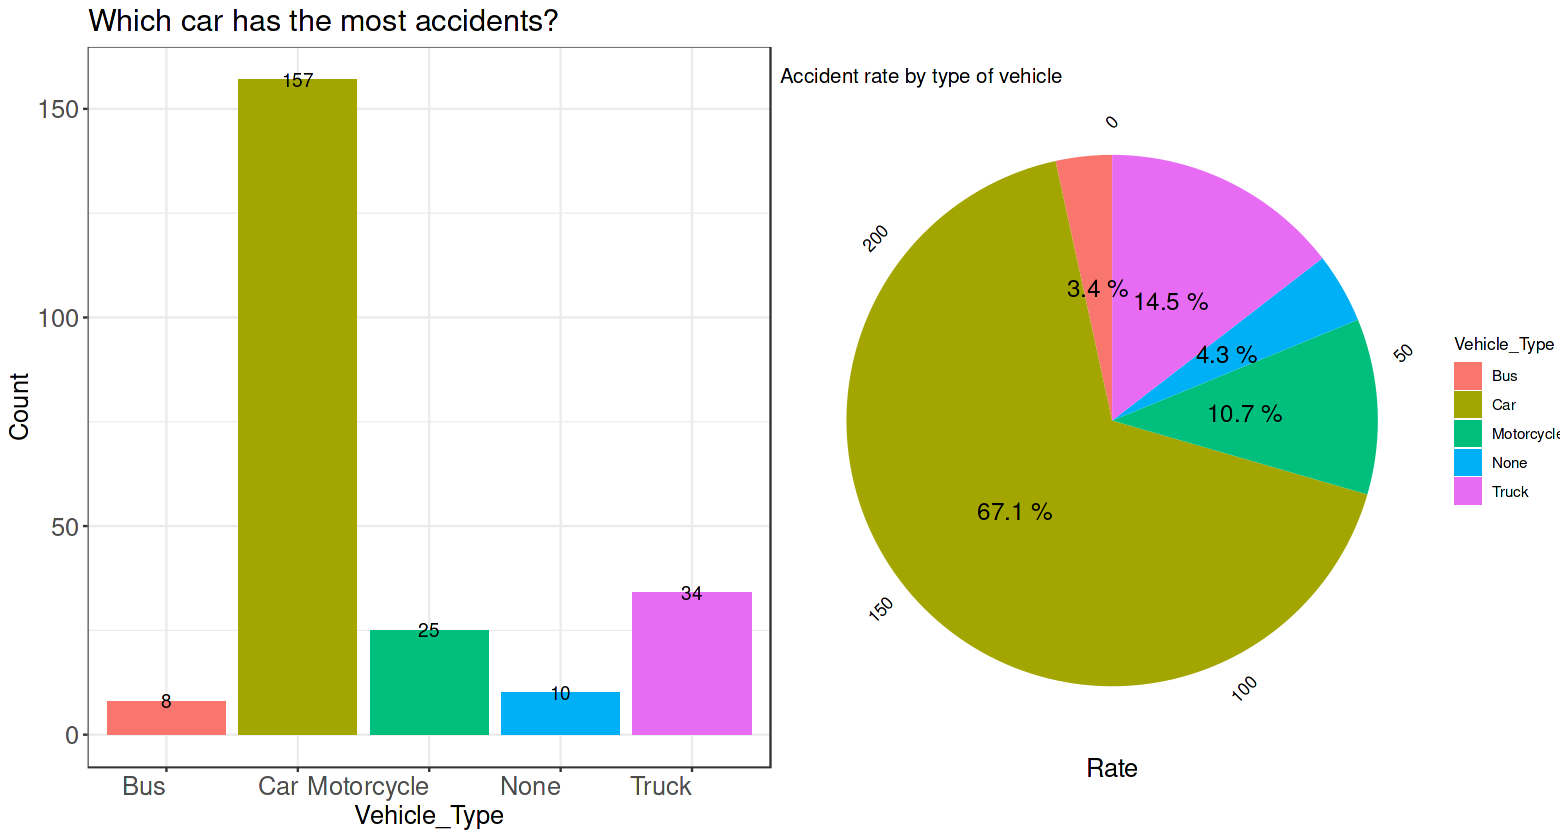

In [630]:
a <- ggplot(Accident_Vehicle) + geom_col(aes(x=factor(Vehicle_Type) , y = n , fill = Vehicle_Type), position = "dodge") +
    geom_text(aes(x= Vehicle_Type , y = n, label = n )) +
    ggtitle('Which car has the most accidents?') +
    xlab('Vehicle_Type') +
    ylab('Count')+
    theme_bw() +
    theme(
    legend.position='none',
    axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    axis.text.y = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

b <- ggplot(Accident_Vehicle, aes(x= 1 , y= n , fill = Vehicle_Type)) + geom_bar(stat= 'identity') + 
        geom_text(aes(label = pct), position = position_stack(vjust = 0.5), size = 5) +
        coord_polar('y', start = 0) +
        ggtitle('Accident rate by type of vehicle') +
        labs(x = '' , y = 'Rate') +
        theme_void() +
        theme(
        axis.title = element_text(size=15),
        axis.text.x = element_text(size = 10, angle = 45, hjust=1),
        title = element_text(size=10)
        )

grid.arrange(a,b, ncol = 2)

## **The seriousness of an accident caused by drinking**

In [631]:
Accident_Severity_alcohol <- df %>% group_by(Accident_Severity, Accident) %>% count(Accident_Severity) %>% filter(Accident == 1)

In [632]:
Accident_Severity_alcohol

Accident_Severity,Accident,n
<chr>,<dbl>,<int>
High,1,19
Low,1,131
Moderate,1,74
None,1,10


In [633]:
pct2 <- paste(round(Accident_Severity_alcohol$n / sum(Accident_Severity_alcohol$n) * 100 ,1),'%')

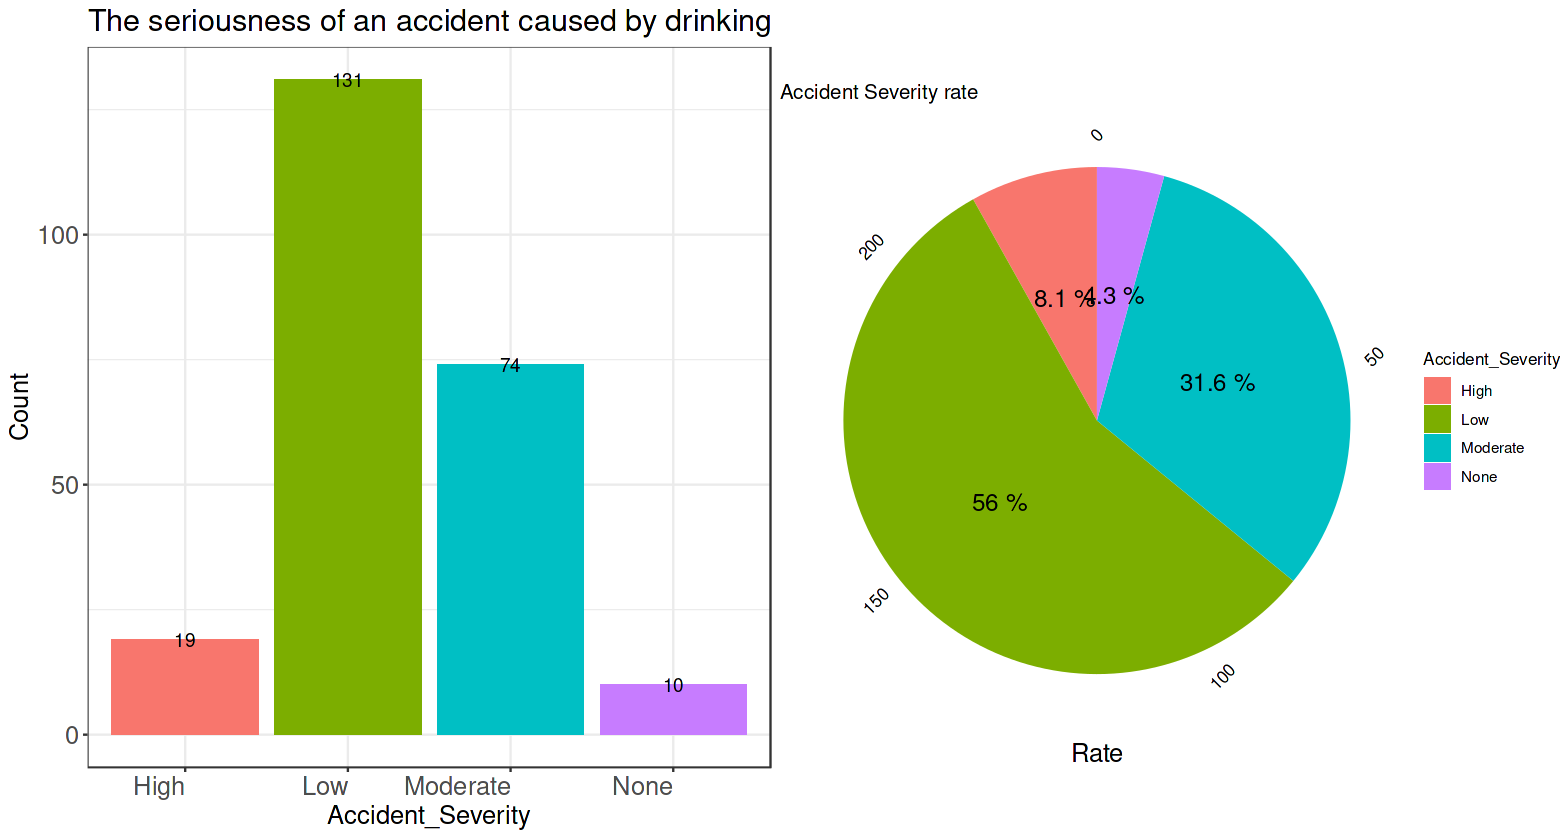

In [634]:
a <- ggplot(Accident_Severity_alcohol) + geom_col(aes(x=factor(Accident_Severity) , y = n , fill = Accident_Severity), position = "dodge") +
    geom_text(aes(x= Accident_Severity , y = n, label = n )) +
    ggtitle('The seriousness of an accident caused by drinking') +
    xlab('Accident_Severity') +
    ylab('Count')+
    theme_bw() +
    theme(
    legend.position='none',
    axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    axis.text.y = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

b <- ggplot(Accident_Severity_alcohol, aes(x= 1 , y= n , fill = Accident_Severity)) + geom_bar(stat= 'identity') + 
        geom_text(aes(label = pct2), position = position_stack(vjust = 0.5), size = 5) +
        coord_polar('y', start = 0) +
        ggtitle('Accident Severity rate') +
        labs(x = '' , y = 'Rate') +
        theme_void() +
        theme(
        axis.title = element_text(size=15),
        axis.text.x = element_text(size = 10, angle = 45, hjust=1),
        title = element_text(size=10)
        )

grid.arrange(a,b, ncol = 2)

## **Speed, Driving Experience and Accidents**

Warning message:
“Removed 42 rows containing missing values or values outside the scale range
(`geom_point()`).”


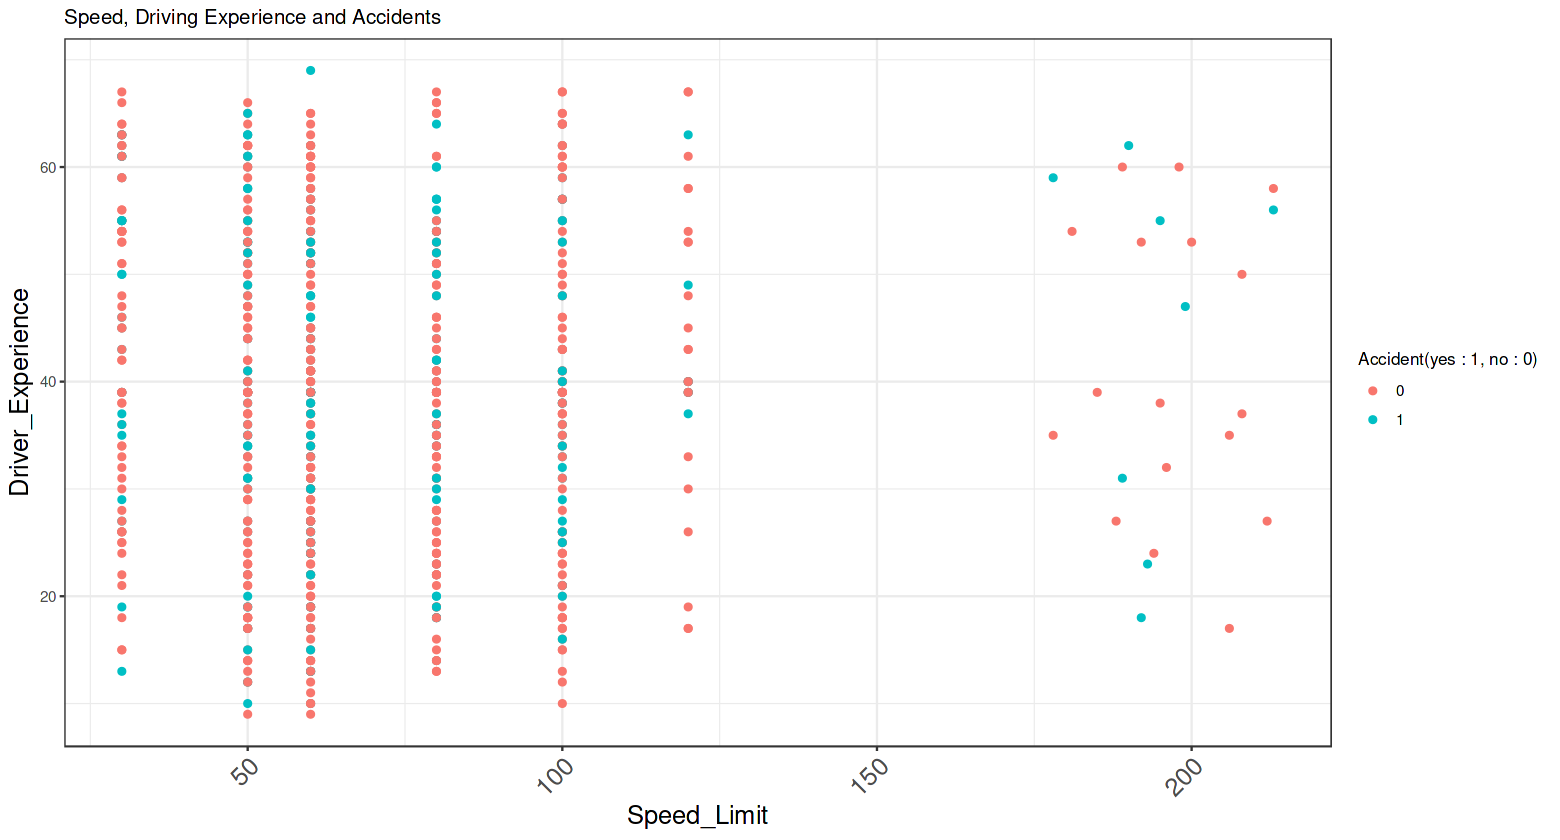

In [635]:
ggplot(df) + geom_point(aes(x = Speed_Limit , y = Driver_Experience , color = factor(Accident)))+   
        ggtitle('Speed, Driving Experience and Accidents') +
        theme_bw() +
        labs(color = "Accident(yes : 1, no : 0)")+
        theme(
        axis.title = element_text(size=15),
        axis.text.x = element_text(size = 15, angle = 45, hjust=1),
        title = element_text(size=10)
        )

## **Correlation**

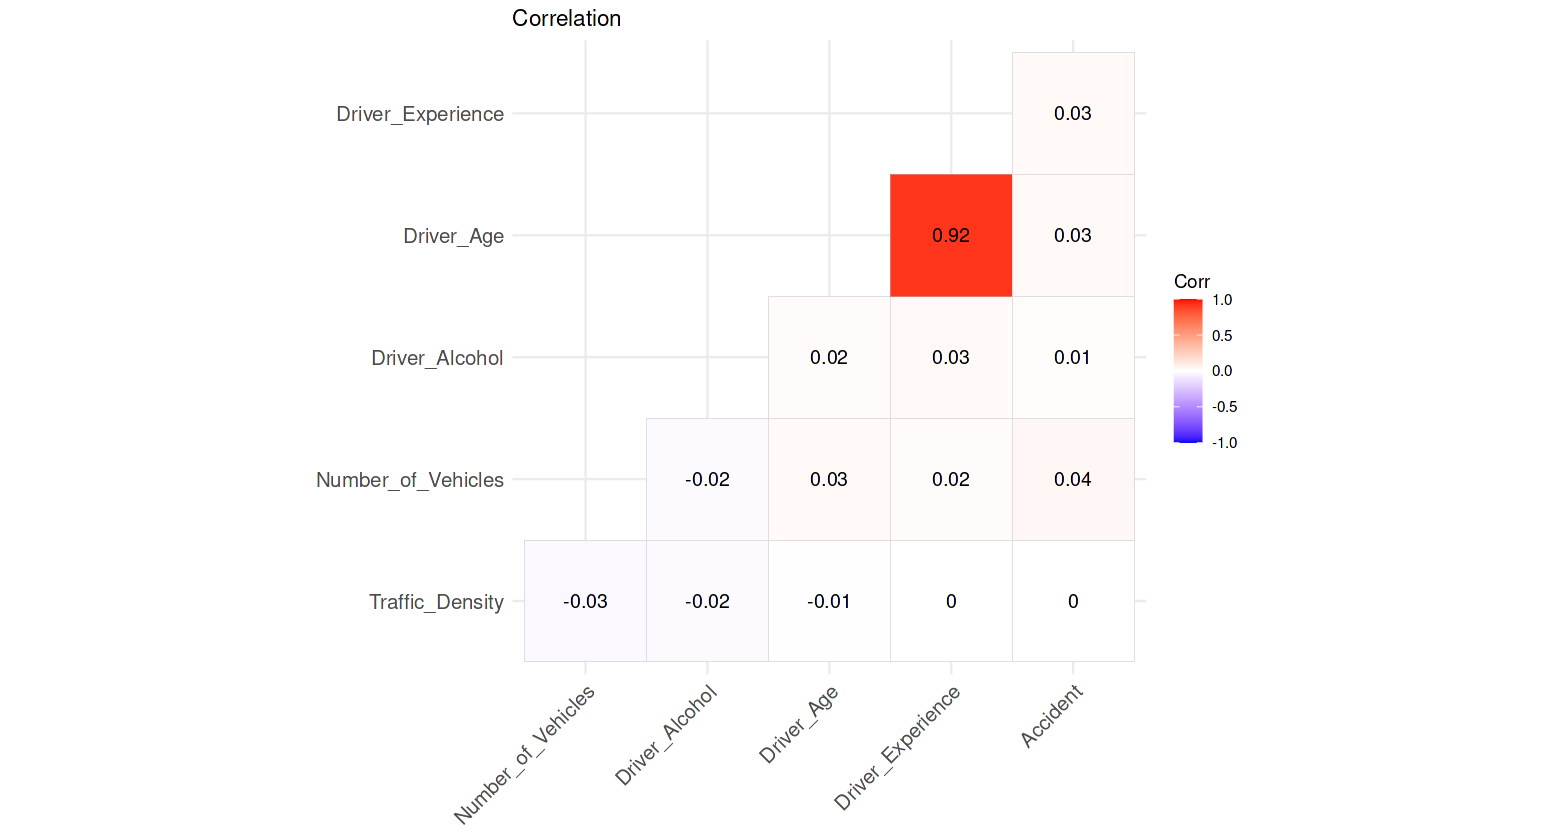

In [636]:
ggcorrplot(cor(df[,num_cols], method = 'pearson') , type = "lower", lab=T, title = 'Correlation')

* **Drinking is not a big cause of accidents.**
* **There are many accidents even on sunny days.**
* **Regular cars have the most accidents.**
* **Drinking doesn't cause a big accident.**
* **Accidents occur even if the maximum speed allowed on the road is small.**

## **4. Modeling**

In [637]:
library(tidymodels)
library(finetune)
library(xgboost)
library(bonsai)
library(themis)
library(caret)
library(withr)
library(Metrics)
library(Matrix)
library(mltools)
library(data.table)
library(knitr)
library(kableExtra)
library(patchwork)
library(PerformanceAnalytics)

## **Data Preprocessing**

In [638]:
df$Weather <- ifelse(df$Weather == 'Clear',0 ,1) # No weather : 0, there is 1

df$Road_Type <- ifelse(df$Road_Type == 'Highway',0,
                      ifelse(df$Road_Type == 'City Road',1,
                            ifelse(df$Road_Type == 'Rural Road',2,
                                  ifelse(df$Road_Type == 'Mountain Road',3,4))))

df$Time_of_Day <- ifelse(df$Time_of_Day == 'Morning',0,
                        ifelse(df$Time_of_Day == 'Afternoon',1,
                              ifelse(df$Time_of_Day == 'Evening',2,
                                    ifelse(df$Time_of_Day == 'Night',3,4))))

df$Accident_Severity <- ifelse(df$Accident_Severity == 'Low',0,
                            ifelse(df$Accident_Severity == 'Moderate',1,
                              ifelse(df$Accident_Severity == 'High',2,3)))


df$Road_Condition <- ifelse(df$Road_Condition == 'Dry',0,
                            ifelse(df$Road_Condition == 'Wet',1,
                              ifelse(df$Road_Condition == 'Icy',2, 
                                    ifelse(df$Road_Condition == 'Under Construction',3,4))))


df$Vehicle_Type <- ifelse(df$Vehicle_Type == 'Car',0,
                            ifelse(df$Vehicle_Type == 'Truck',1,
                              ifelse(df$Vehicle_Type == 'Motorcycle',2, 
                                  ifelse(df$Vehicle_Type == 'Bus',3,4))))


df$Road_Light_Condition <- ifelse(df$Road_Light_Condition == 'Daylight',0,
                            ifelse(df$Road_Light_Condition == 'Artificial Light',1,
                              ifelse(df$Road_Light_Condition == 'No Light',2,3)))

In [639]:
df$Accident <- as.factor(df$Accident)

## **Standard scale**

In [640]:
#Standard scale

standard <- function(x){
    return ((x-mean(x, na.rm=T))/sd(x, na.rm=T))
}

In [641]:
data <- df %>% select(-Accident)
data <- as.data.frame(lapply(data,standard))

In [642]:
data$Accident <- df$Accident

In [643]:
head(data)

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.8036932,0.06862276,-1.2645075,0.000000,0.8941601,0.8732832,-0.4282775,2.7929232,-0.05949937,-0.5559074,0.5314065,0.6105252,0.2306016,0
2,-1.2427478,0.95321306,1.3877434,0.000000,1.5136870,-0.1393080,-0.4282775,0.4393362,-0.05949937,0.3451213,0.3955916,0.2741982,0.2306016,0
3,0.8036932,-0.81596753,0.5036598,0.000000,-0.3448937,0.3669876,-0.4282775,-0.7374573,0.74520520,-0.5559074,0.7351288,0.8795868,0.2306016,0
4,-1.2427478,0.06862276,-0.3804239,1.310216,-0.3448937,-0.1393080,-0.4282775,-0.7374573,1.54990977,2.1471787,-0.6230198,-0.5329866,-1.0210191,0
5,0.8036932,-0.81596753,-1.2645075,0.000000,3.8369130,3.9110568,-0.4282775,-0.7374573,-0.86420394,-0.5559074,1.2783882,1.0813830,0.2306016,1
6,-1.2427478,0.95321306,1.3877434,-1.310216,1.5136870,-0.1393080,-0.4282775,0.4393362,2.35461435,0.3451213,0.3955916,0.2741982,0.2306016,0


## **Split Data**

In [644]:
idx <- sample(nrow(data), nrow(data) * 0.75)
train <- data[idx,]
test <- data[-idx, ]

## **XGB Model**

In [645]:
xgb_rec <-
  recipe(Accident ~ ., data = train) %>%
  step_dummy(all_nominal_predictors()) %>%
  step_YeoJohnson(all_numeric_predictors())

In [646]:
xgb_spec <-
  boost_tree(
    trees = tune(),
    tree_depth = tune(),
    learn_rate = tune(),
    mtry = tune(),
    min_n = tune(),
    loss_reduction = tune()
  ) %>%
  set_engine(engine = "xgboost", 
             nthread  = future::availableCores()) %>%
  set_mode(mode = "classification")

In [647]:
set.seed(123)

cv_fold <- vfold_cv (train, v = 10, strata = "Accident")

In [648]:
xgb_wf <- workflow() %>%
  add_recipe(xgb_rec) %>%
  add_model(xgb_spec)

xgb_wf

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: boost_tree()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_dummy()
• step_YeoJohnson()

── Model ───────────────────────────────────────────────────────────────────────
Boosted Tree Model Specification (classification)

Main Arguments:
  mtry = tune()
  trees = tune()
  min_n = tune()
  tree_depth = tune()
  learn_rate = tune()
  loss_reduction = tune()

Engine-Specific Arguments:
  nthread = future::availableCores()

Computational engine: xgboost 


In [649]:
xgb_ctrl <- control_grid(verbose = TRUE,
                         save_pred = TRUE,
                         save_workflow = TRUE)

## **Parameters**

In [650]:
params <- xgb_wf %>%
  extract_parameter_set_dials() %>%
  update(
    trees = trees(range = c(200, 1500)),
    mtry = mtry(range = c(5, 20)),
    min_n = min_n(range = c(10, 90)),
    tree_depth = tree_depth(range = c(11, 20)),
    learn_rate = learn_rate(range = c(-2,3))
  ) %>%
  finalize(train)

## **Tuen Grid**

In [651]:
xgb_res <- tune_grid(
  xgb_wf,
  resamples = cv_fold,
  grid = 4,
  control = xgb_ctrl,
  metrics = metric_set(roc_auc),
  param_info = params
)

i Fold01: preprocessor 1/1

✓ Fold01: preprocessor 1/1

i Fold01: preprocessor 1/1, model 1/4

✓ Fold01: preprocessor 1/1, model 1/4

i Fold01: preprocessor 1/1, model 1/4 (extracts)

i Fold01: preprocessor 1/1, model 1/4 (predictions)

i Fold01: preprocessor 1/1, model 2/4

✓ Fold01: preprocessor 1/1, model 2/4

i Fold01: preprocessor 1/1, model 2/4 (extracts)

i Fold01: preprocessor 1/1, model 2/4 (predictions)

i Fold01: preprocessor 1/1, model 3/4

✓ Fold01: preprocessor 1/1, model 3/4

i Fold01: preprocessor 1/1, model 3/4 (extracts)

i Fold01: preprocessor 1/1, model 3/4 (predictions)

i Fold01: preprocessor 1/1, model 4/4

✓ Fold01: preprocessor 1/1, model 4/4

i Fold01: preprocessor 1/1, model 4/4 (extracts)

i Fold01: preprocessor 1/1, model 4/4 (predictions)

i Fold02: preprocessor 1/1

✓ Fold02: preprocessor 1/1

i Fold02: preprocessor 1/1, model 1/4

✓ Fold02: preprocessor 1/1, model 1/4

i Fold02: preprocessor 1/1, model 1/4 (extracts)

i Fold02: preprocessor 1/1, model 1/

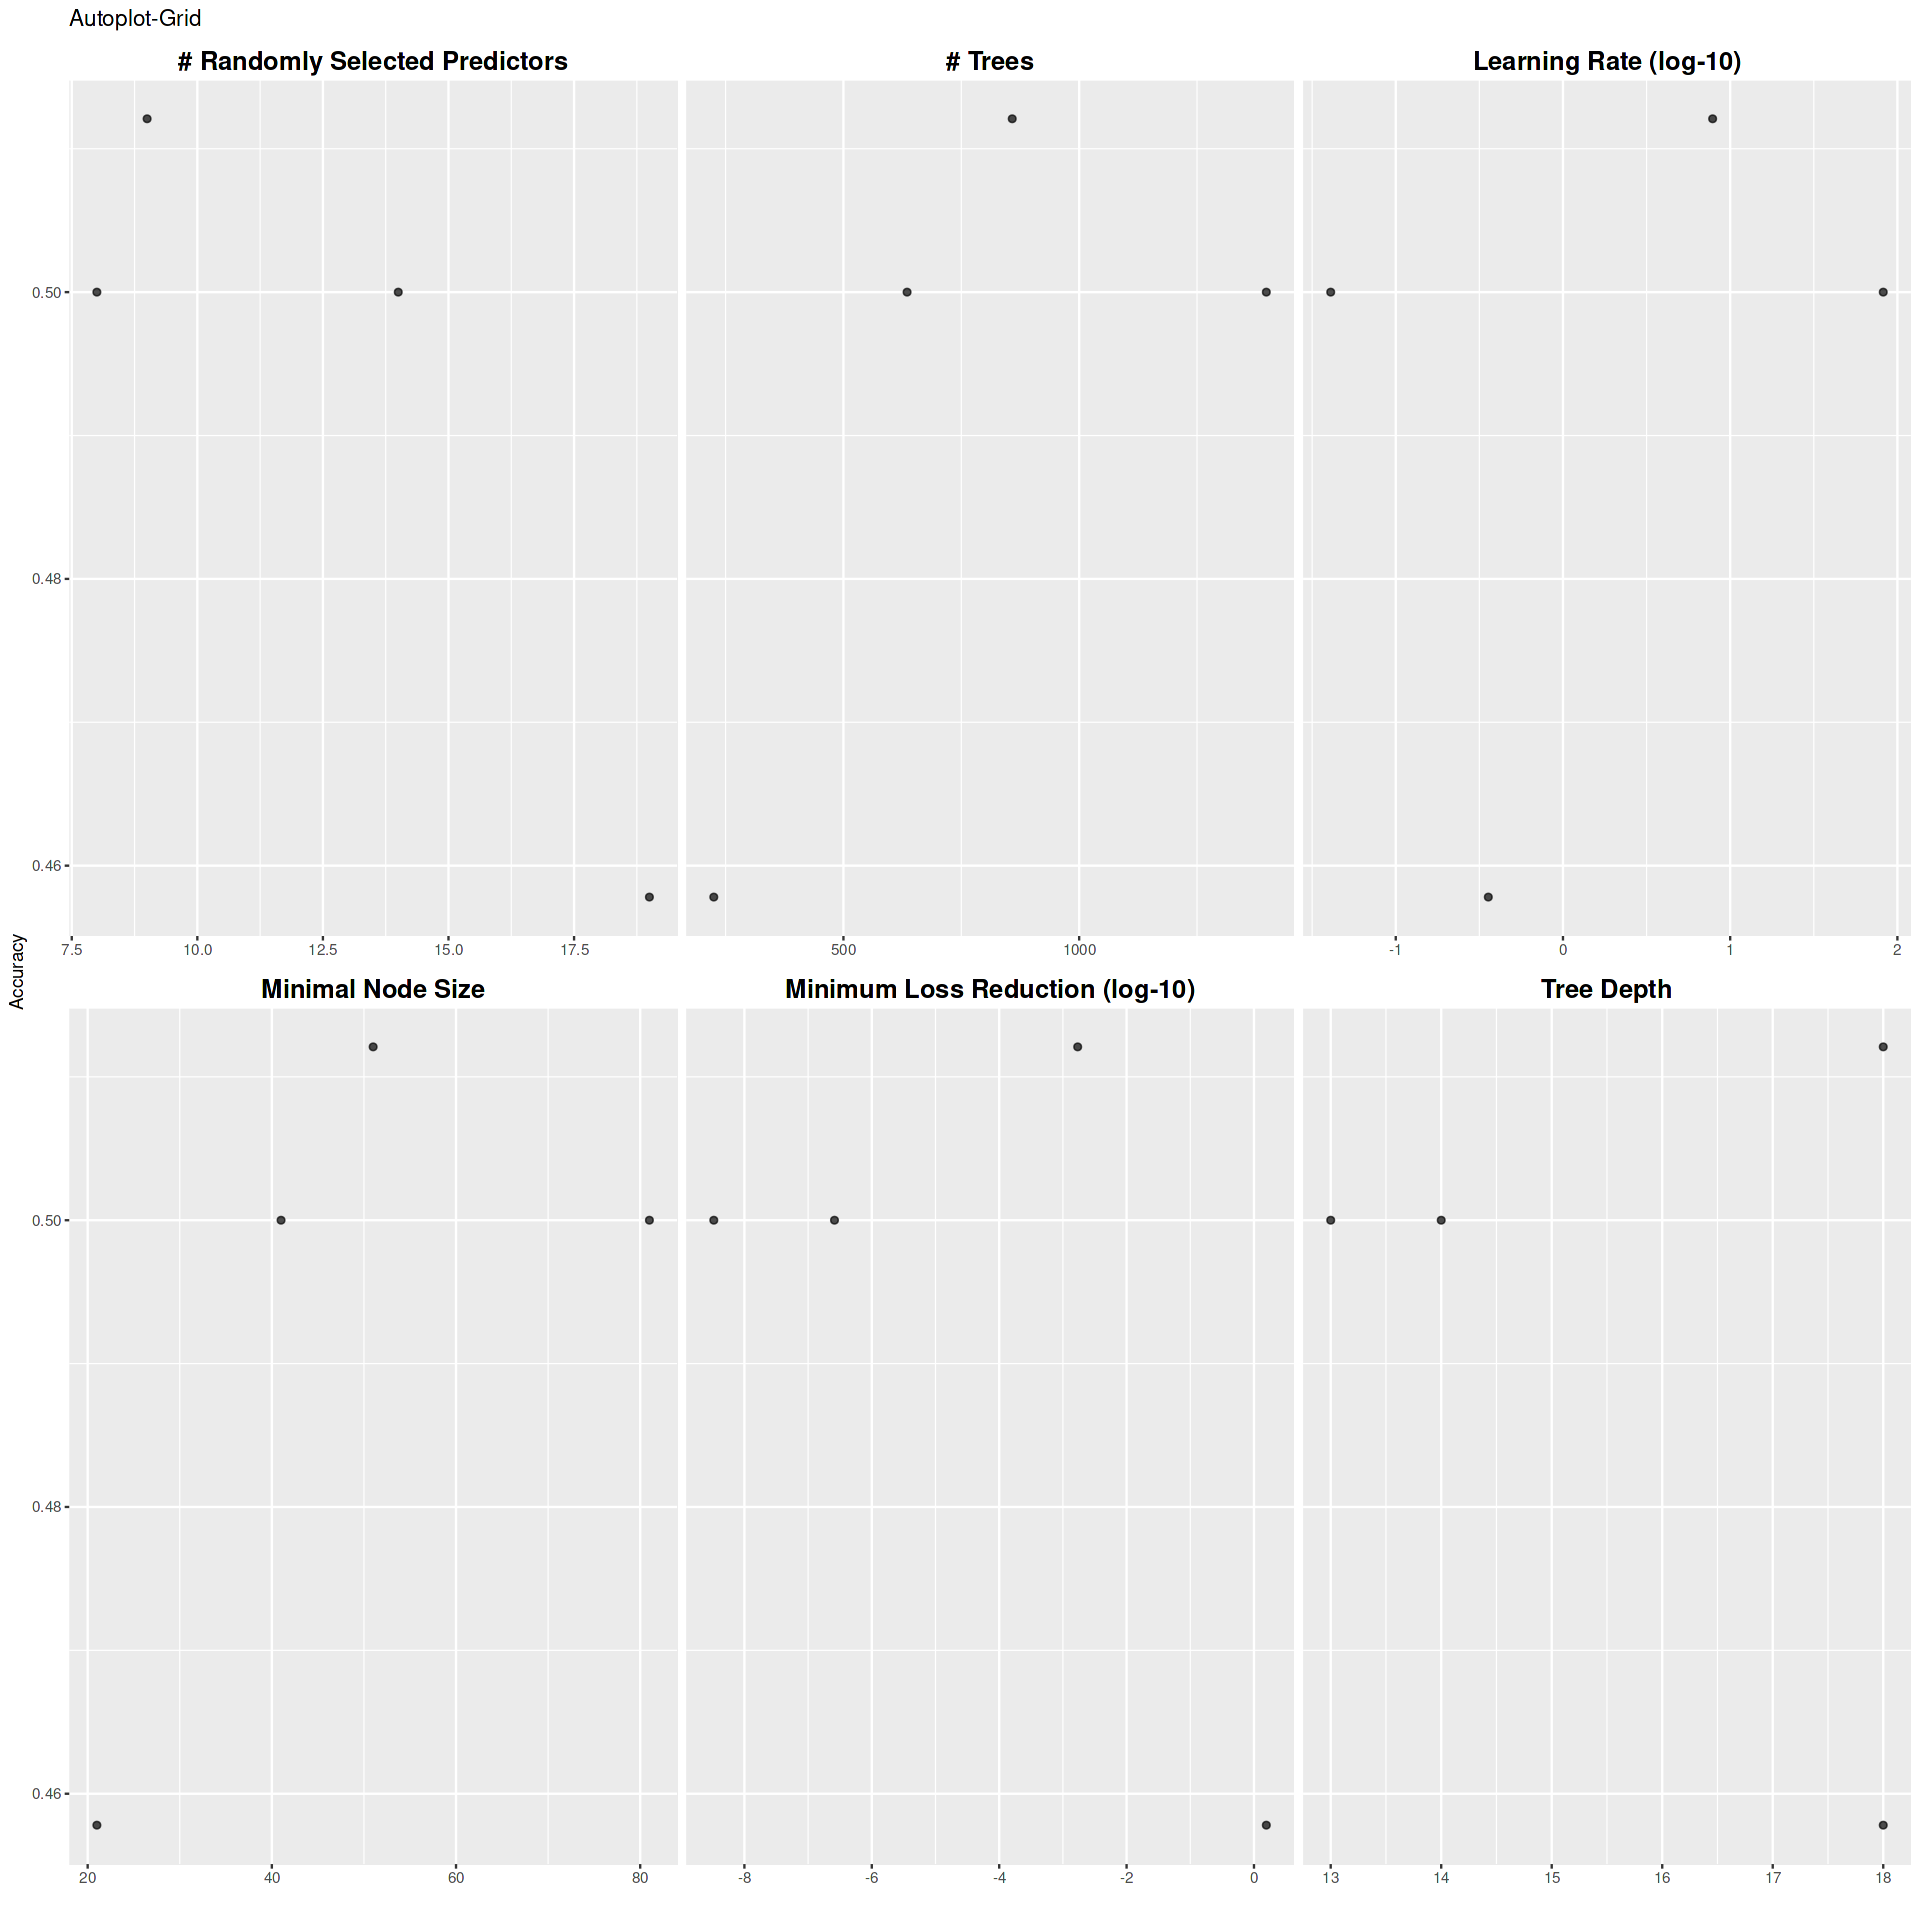

In [652]:
options(repr.plot.width = 16.0, repr.plot.height = 16.0)

autoplot(xgb_res) +
  theme(
    legend.position = "top",
    strip.background = element_rect(fill = "white"),
    strip.background.x = element_rect(colour = "white"),
    strip.background.y = element_rect(colour = "white"),
    strip.text = element_text(
      color = "black",
      face = "bold",
      size = 15
    ),
    
  ) +
  labs(title = "Autoplot-Grid",
    y = "Accuracy")

In [653]:
show_best(xgb_res, metric = "roc_auc") %>%
  kbl() %>%
  kable_classic(full_width = F, position = "left")

<table class=" lightable-classic" style='font-family: "Arial Narrow", "Source Sans Pro", sans-serif; width: auto !important; '>
 <thead>
  <tr>
   <th style="text-align:right;"> mtry </th>
   <th style="text-align:right;"> trees </th>
   <th style="text-align:right;"> min_n </th>
   <th style="text-align:right;"> tree_depth </th>
   <th style="text-align:right;"> learn_rate </th>
   <th style="text-align:right;"> loss_reduction </th>
   <th style="text-align:left;"> .metric </th>
   <th style="text-align:left;"> .estimator </th>
   <th style="text-align:right;"> mean </th>
   <th style="text-align:right;"> n </th>
   <th style="text-align:right;"> std_err </th>
   <th style="text-align:left;"> .config </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:right;"> 9 </td>
   <td style="text-align:right;"> 858 </td>
   <td style="text-align:right;"> 51 </td>
   <td style="text-align:right;"> 18 </td>
   <td style="text-align:right;"> 7.8529299 </td>
   <td style="text-align:rig

<table class=" lightable-classic" style='font-family: "Arial Narrow", "Source Sans Pro", sans-serif; width: auto !important; '>
 <thead>
  <tr>
   <th style="text-align:right;"> mtry </th>
   <th style="text-align:right;"> trees </th>
   <th style="text-align:right;"> min_n </th>
   <th style="text-align:right;"> tree_depth </th>
   <th style="text-align:right;"> learn_rate </th>
   <th style="text-align:right;"> loss_reduction </th>
   <th style="text-align:left;"> .metric </th>
   <th style="text-align:left;"> .estimator </th>
   <th style="text-align:right;"> mean </th>
   <th style="text-align:right;"> n </th>
   <th style="text-align:right;"> std_err </th>
   <th style="text-align:left;"> .config </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:right;"> 9 </td>
   <td style="text-align:right;"> 858 </td>
   <td style="text-align:right;"> 51 </td>
   <td style="text-align:right;"> 18 </td>
   <td style="text-align:right;"> 7.8529299 </td>
   <td style="text-align:right;"> 0.0017078 </td>
   <td style="text-align:left;"> roc_auc </td>
   <td style="text-align:left;"> binary </td>
   <td style="text-align:right;"> 0.5120900 </td>
   <td style="text-align:right;"> 10 </td>
   <td style="text-align:right;"> 0.0184960 </td>
   <td style="text-align:left;"> Preprocessor1_Model2 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 8 </td>
   <td style="text-align:right;"> 635 </td>
   <td style="text-align:right;"> 41 </td>
   <td style="text-align:right;"> 13 </td>
   <td style="text-align:right;"> 82.2884194 </td>
   <td style="text-align:right;"> 0.0000003 </td>
   <td style="text-align:left;"> roc_auc </td>
   <td style="text-align:left;"> binary </td>
   <td style="text-align:right;"> 0.5000000 </td>
   <td style="text-align:right;"> 10 </td>
   <td style="text-align:right;"> 0.0000000 </td>
   <td style="text-align:left;"> Preprocessor1_Model1 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 14 </td>
   <td style="text-align:right;"> 1397 </td>
   <td style="text-align:right;"> 81 </td>
   <td style="text-align:right;"> 14 </td>
   <td style="text-align:right;"> 0.0408297 </td>
   <td style="text-align:right;"> 0.0000000 </td>
   <td style="text-align:left;"> roc_auc </td>
   <td style="text-align:left;"> binary </td>
   <td style="text-align:right;"> 0.5000000 </td>
   <td style="text-align:right;"> 10 </td>
   <td style="text-align:right;"> 0.0000000 </td>
   <td style="text-align:left;"> Preprocessor1_Model3 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 19 </td>
   <td style="text-align:right;"> 225 </td>
   <td style="text-align:right;"> 21 </td>
   <td style="text-align:right;"> 18 </td>
   <td style="text-align:right;"> 0.3576757 </td>
   <td style="text-align:right;"> 1.5626054 </td>
   <td style="text-align:left;"> roc_auc </td>
   <td style="text-align:left;"> binary </td>
   <td style="text-align:right;"> 0.4578081 </td>
   <td style="text-align:right;"> 10 </td>
   <td style="text-align:right;"> 0.0288193 </td>
   <td style="text-align:left;"> Preprocessor1_Model4 </td>
  </tr>
</tbody>
</table>

In [656]:
xgb_best <- select_best(xgb_res, metric = "roc_auc")
xgb_best

mtry,trees,min_n,tree_depth,learn_rate,loss_reduction,.config
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>
9,858,51,18,7.85293,0.001707759,Preprocessor1_Model2


In [657]:
set.seed(123)

final_xgb_res <-
  xgb_wf %>%
  finalize_workflow(xgb_best) 

final_xgb_res

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: boost_tree()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_dummy()
• step_YeoJohnson()

── Model ───────────────────────────────────────────────────────────────────────
Boosted Tree Model Specification (classification)

Main Arguments:
  mtry = 9
  trees = 858
  min_n = 51
  tree_depth = 18
  learn_rate = 7.85292988414684
  loss_reduction = 0.00170775851317415

Engine-Specific Arguments:
  nthread = future::availableCores()

Computational engine: xgboost 


In [659]:
final_fit <- xgb_wf %>%
  finalize_workflow(select_best(xgb_res, metric = "roc_auc")) %>%
  fit(train)

final_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: boost_tree()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_dummy()
• step_YeoJohnson()

── Model ───────────────────────────────────────────────────────────────────────
##### xgb.Booster
raw: 582.3 Kb 
call:
  xgboost::xgb.train(params = list(eta = 7.85292988414684, max_depth = 18L, 
    gamma = 0.00170775851317415, colsample_bytree = 1, colsample_bynode = 0.692307692307692, 
    min_child_weight = 51L, subsample = 1), data = x$data, nrounds = 858L, 
    watchlist = x$watchlist, verbose = 0, nthread = c(system = 4), 
    objective = "binary:logistic")
params (as set within xgb.train):
  eta = "7.85292988414684", max_depth = "18", gamma = "0.00170775851317415", colsample_bytree = "1", colsample_bynode = "0.692307692307692", min_child_weight = "51", subsample = "1", nthread = "4", objective = "binary:logistic", validate_pa

In [660]:
pred <- predict(final_fit, new_data = test, type = 'class')

In [661]:
pred <- as.data.frame(pred)
cm_xgb <- confusionMatrix(pred$.pred_class, test$Accident)
cm_xgb

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 146  61
         1   0   0
                                          
               Accuracy : 0.7053          
                 95% CI : (0.6382, 0.7665)
    No Information Rate : 0.7053          
    P-Value [Acc > NIR] : 0.5345          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : 1.564e-14       
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.7053          
         Neg Pred Value :    NaN          
             Prevalence : 0.7053          
         Detection Rate : 0.7053          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : 0               
                              

## **HeatMap**

In [662]:
xgb_heatmap <- data.frame(cm_xgb$table)

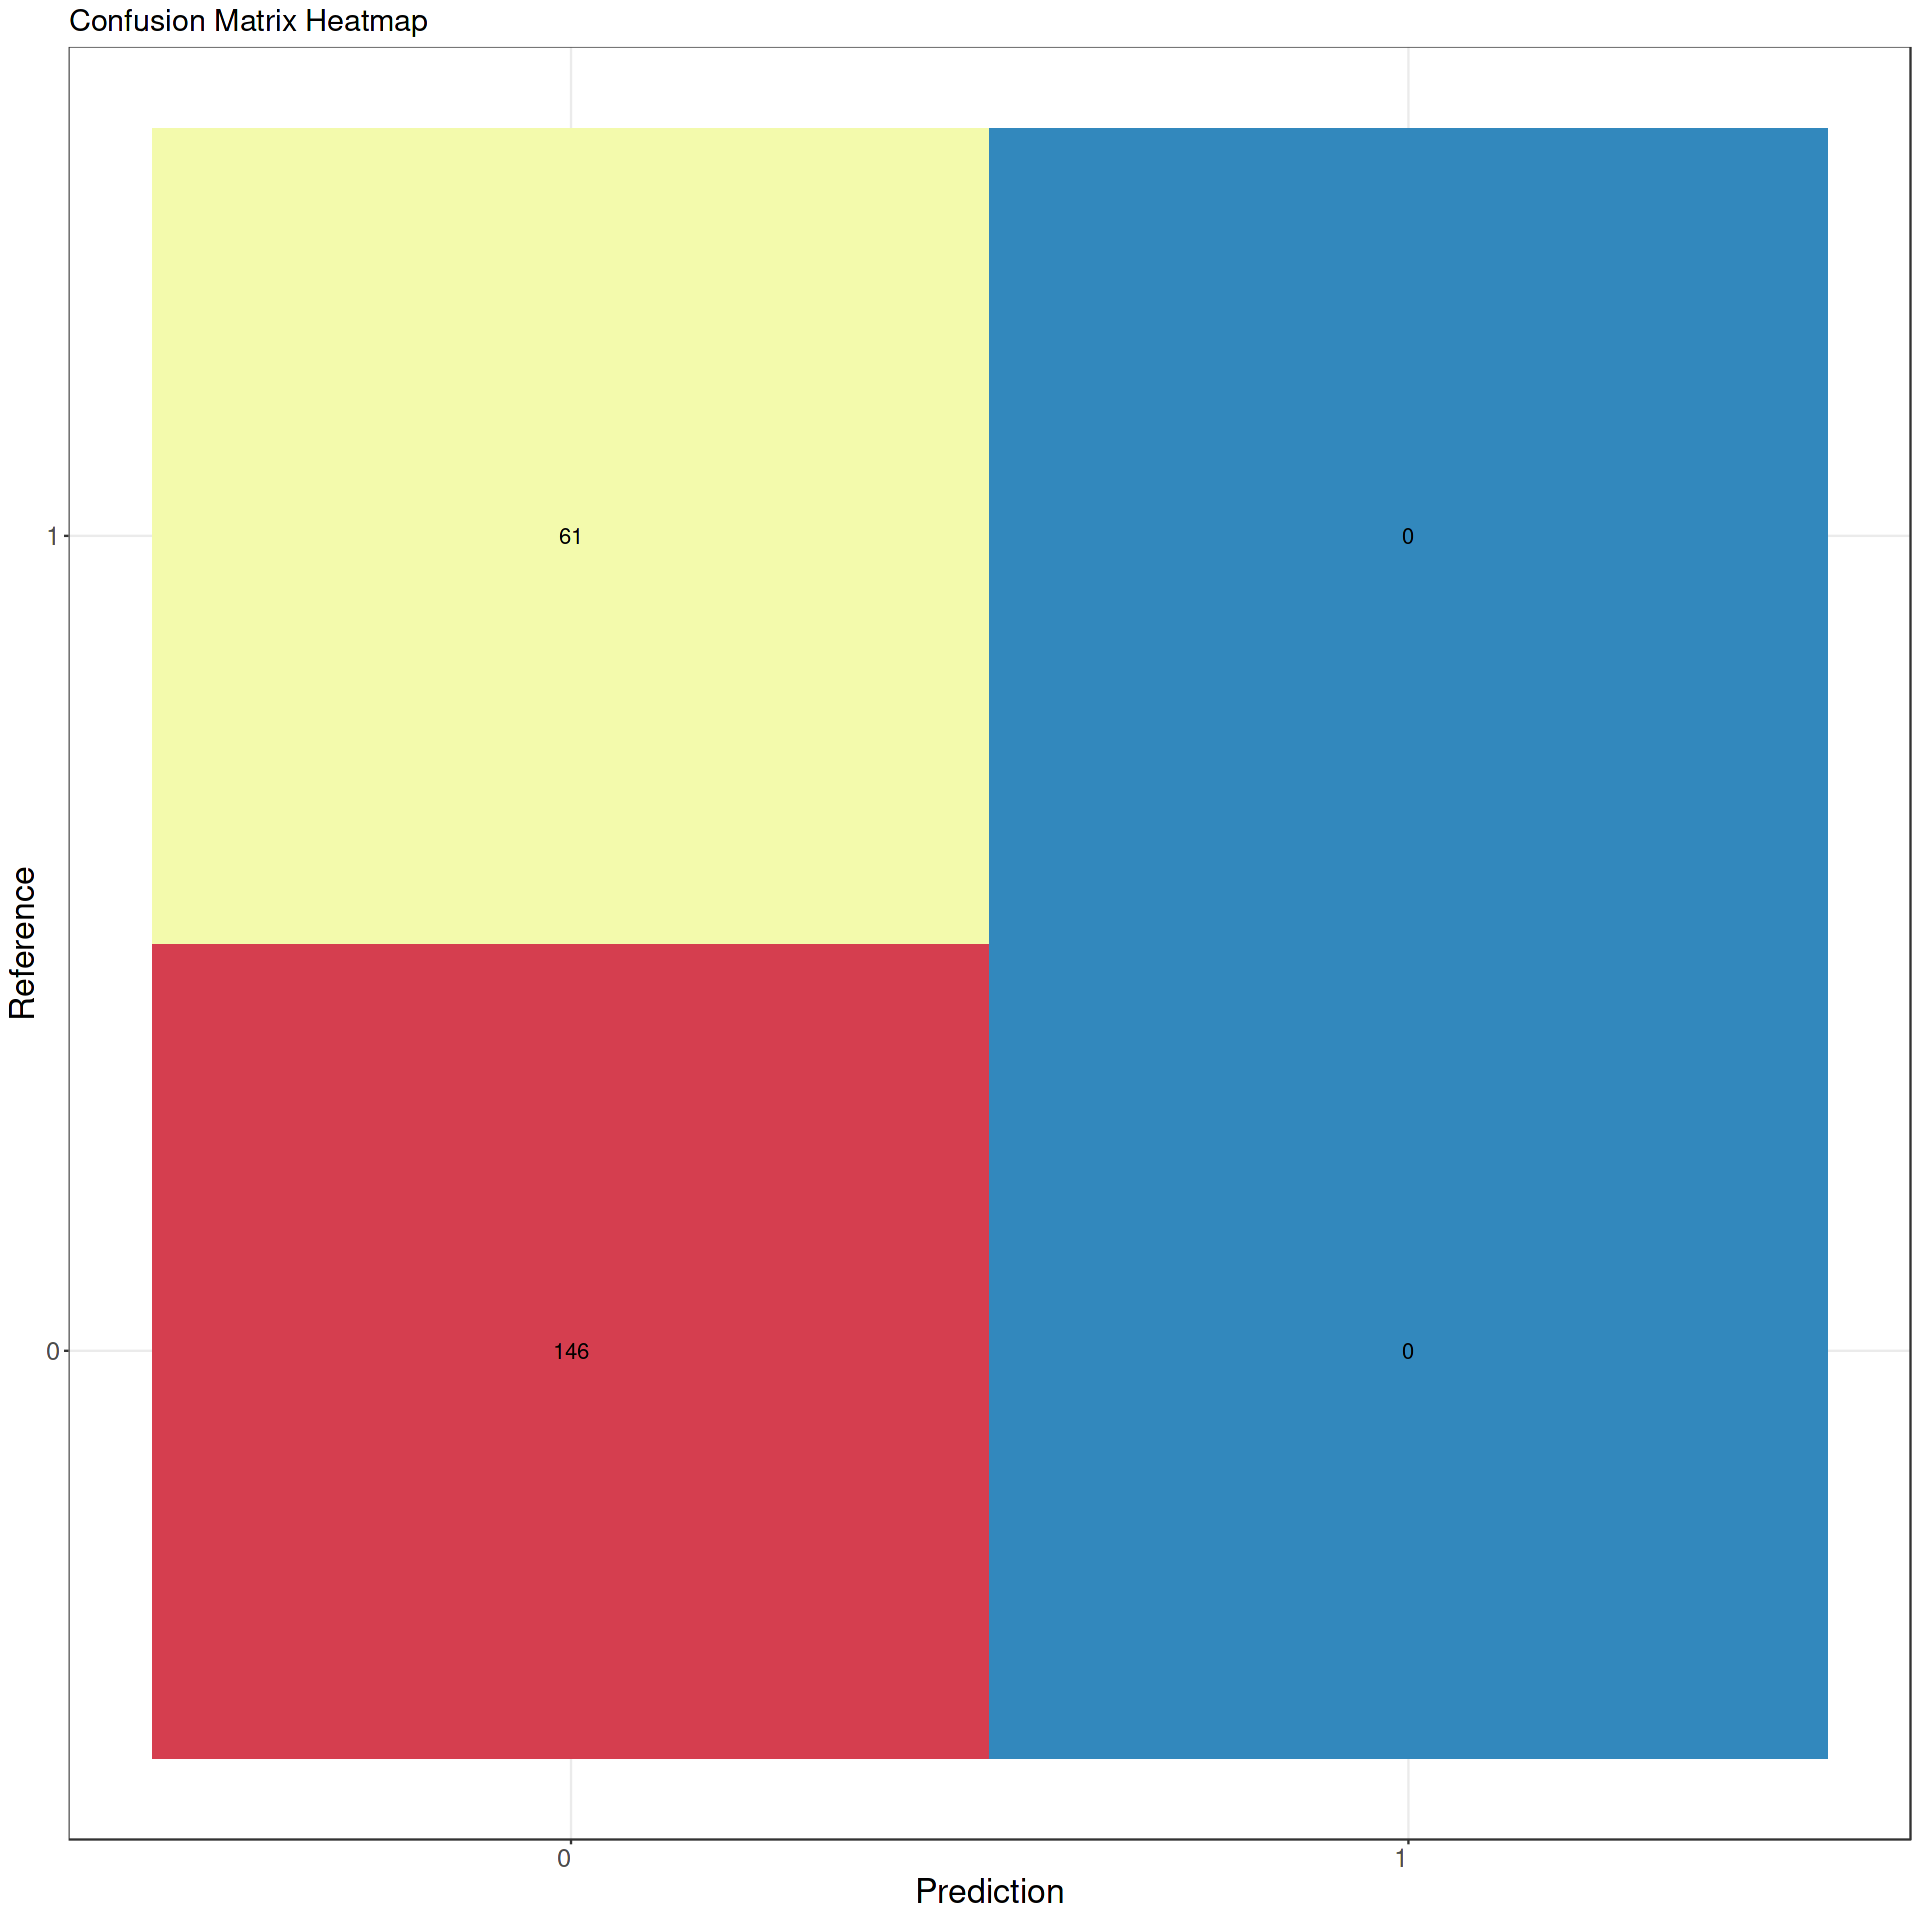

In [663]:
ggplot(xgb_heatmap) + geom_tile(aes(x= Prediction, y= Reference, fill = Freq)) +
                geom_text(aes(x= Prediction, y= Reference , label = Freq, size = 40), alpha = 5,) +
                scale_fill_distiller(palette = 'Spectral')+
                ggtitle('Confusion Matrix Heatmap') +
                theme_bw() +
                theme(
                legend.position = 'none',
                axis.title = element_text(size=20),
                axis.text.x = element_text(size = 15, hjust=1),
                axis.text.y = element_text(size = 15, hjust=1),
                title = element_text(size=15)
                )

**Thankyou. Please leave your advice in the comments**